# **Multivariate Weather Data Clustering using K-Means Algorithm**

<a name="t0"></a>
###**Table of Contents**

>##### [1. Abstract](#t1)
>##### [2. Student Author and Mentors](#t2)
>##### [3. Introduction](#t3)
>##### [4. Explanation of the dataset](#t4)
>##### [5. Explanation of the algorithm](#t5)
>##### [6. Explanation of the preprocessing code](#t6)
>##### [7. How the clustering algorithm is applied to our dataset?](#t7)
>##### [8. Experiments: the results of the clustering algorithm with different datasets](#t8)
>##### [9. Result Evaluation](#t9)
>>##### [9.1 Evaluation score of results using Root Mean Squared Error and Silhouette Score](#t9.1)
>>##### [9.2 Plots of clustered variables](#t9.2)
>>##### [9.3. Clustering results and their evaluation with varying k value](#t9.3)
>>##### [9.4. Clustering results of daily data with and without PCA.](#t9.4)
>##### [10. Findings](#t10)
>##### [11. Summary](#t11)
>##### [12. References](#t12)

<a name="t1"></a>
# **1. Abstract:**

<p align='justify'>
For this project, the available data was collected and presented in the NetCDF4 format which is a file format designed to support the creation, access, and sharing of scientific data. Since we were dealing with climate data that comprises of spatial information, time information and scientific values, the NetCDF4 data format was the best suited format to hold all of this information in a convenient fashion.
</p>
<p align='justify'>
The task at hand was to extend an existing clustering algorithm to make it working with a four dimensional (4D) multivariate weather dataset. Although the end goal was to utilize the weather data (based on all the available attributes) to group similar days together, an imperative task that had to be handled initially was to bring down the xarray dataset into a two dimensional format so that traditional machine learning algorithms can work well. 
</p>
<p align='justify'>
By transforming the given data into a two dimensional format, we could successfully apply traditional machine learning algorithms like K-means to group similar days together. In this report, we present our work and main findings
</p>


>###### [Back to Table of Contents](#t0)

<a name="t2"></a>
## **2.**
## **Student Author**: 
>> **Sai Sri Ram Kuram Tirumala, M.S. in Information Systems, UMBC**
## **Mentors**: 
>> **1. Dr. Jianwu Wang, Associate Professor of Data Science and Liaison for Research Innovation, UMBC**<br>
>> **2. Dr. Xue Zheng, Research Scientist, Lawrence Livermore National Laboratory**
            

>###### [Back to Table of Contents](#t0)

<a name="t3"></a>
# **3. Introduction:**
<p align="justify">
In data science, we frequently consider ways to utilize data to predict new data points. We refer to this as "supervised learning." Majority of the time when dealing with real-world issues, data won't have predefined labels, thus we'll want to create machine learning models that can accurately categorize this data by identifying some commonalities in the characteristics that will be used to predict the classes on new data. "Unsupervised learning" is what this is known as.
</p>
<p align="justify">
As previously mentioned, our ultimate objective is to group similar days together using the supplied data. There are many techniques used in machine learning to group data points for further analysis based on similarity; all of these techniques fall under the broader technique known as clustering. K-means Clustering algorithm is the most often used clustering algorithm. This approach is both exceedingly simple to use and extremely effective computationally. These are the primary explanations for why it is so well-liked. However, when working with groups that do not have a spherical distribution form, it is not very effective at identifying classes.
</p>
<p align="justify">
The data we have for this problem is in no way comparable to the data the K-means algorithm typically uses. Moreover, rather than the spherical distribution that K-means is accustomed to, this data will certainly take an arbitrary shape. Hence, we strove hard on this project to make K-means compatible with the provided dataset.
</p>
<br>

>###### [Back to Table of Contents](#t0)

<a name="t4"></a>
## **4. Explanation of the dataset**

<p align="justify">
The data that is being used in this project has been presented in the NETCDF4 format. NetCDF (Network Common Data Form) is a hierarchical data format known as a “self-describing” data structure which means that metadata, or descriptions of the data, are included in the file itself and can be parsed programmatically, meaning that they can be accessed using code to build automated and reproducible workflows.
</p>
<p align="justify">
In this project, dimensions of the given weather data are as follows:<br>
Time = 365 days<br>
Latitude = 41<br>
Longitude = 41<br>
<br>
And, variables provided in the data are as follows (Copernicus Climate Data Store, 2022):<br>
</p>

|Variable Name|Units|Description|
|-------------|-----|-----------|
|10m u-component of wind|m s**-1|This parameter is the eastward component of the 10m wind. <br>It is the horizontal speed of air moving towards the east, at a height of ten metres above the surface of the Earth, in metres per second.|
|10m v-component of wind|m s**-1|This parameter is the northward component of the 10m wind. <br>It is the horizontal speed of air moving towards the north, at a height of ten metres above the surface of the Earth, in metres per second.|
|2m temperature|K|This parameter is the temperature of air at 2m above the surface of land, sea or inland waters. <br>2m temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions.|
|Sea surface temperature|K|This parameter (SST) is the temperature of sea water near the surface. <br>In ERA5, this parameter is a foundation SST, which means there are no variations due to the daily cycle of the sun (diurnal variations). |
|Surface latent heat flux|J m**-2|This parameter is the transfer of latent heat (resulting from water phase changes, such as evaporation or condensation) between the Earth's surface <br>and the atmosphere through the effects of turbulent air motion. |
|Surface sensible heat flux|J m**-2|This parameter is the transfer of heat between the Earth's surface and the atmosphere through the effects of turbulent air motion (but excluding any heat transfer resulting from condensation or evaporation). <br>The magnitude of the sensible heat flux is governed by the difference in temperature between the surface and the overlying atmosphere, wind speed and the surface roughness.|
|Surface pressure|Pa|This parameter is the pressure (force per unit area) of the atmosphere at the surface of land, sea and inland water.<br> It is a measure of the weight of all the air in a column vertically above a point on the Earth's surface.|

<br>

>###### [Back to Table of Contents](#t0)

In [1]:
# Install Statements

!pip install "dask[dataframe]"
!pip install cftime
!pip install utils
!pip install netCDF4 
!pip install scipy 
!pip install geopandas
!pip install "xarray[io]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.5 MB/s 
     |████████████████████████████████| 6.3 MB 37.8 MB/s 
     |████████████████████████████████| 16.7 MB 27.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.6 MB/s 
     |████████████████████████████████| 185 kB 14.4 MB/s 
     |█████████████

In [2]:
# Import Statements

import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import os
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist
from numpy.random import uniform
import seaborn as sns
import random
import dask.dataframe as dd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import sys 
import  pandas
from netCDF4 import Dataset
import matplotlib as mpl 
import matplotlib.colors as colors
import dask.dataframe

/usr/local/lib/python3.7/dist-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [3]:
# Piece of code to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# All the xarray datasets are opened into various variables

mdata_4 = xr.open_dataset('/content/drive/MyDrive/Courses/IS-700-Independent_Study/mock_v4.nc')
mdata_3_1 = xr.open_dataset('/content/drive/MyDrive/Courses/IS-700-Independent_Study/mock3.1.nc')
mdata_2_1 = xr.open_dataset('/content/drive/MyDrive/Courses/IS-700-Independent_Study/mock2.1.nc')
mdata_1 = xr.open_dataset('/content/drive/MyDrive/Courses/IS-700-Independent_Study/mock1.nc')
rdata_daily = xr.open_dataset('/content/drive/MyDrive/Courses/IS-700-Independent_Study/ERA5_meteo_sfc_2021_daily.nc').rename({'latitude':'lat','longitude':'lon'})
rdata_hourly = xr.open_dataset('/content/drive/MyDrive/Courses/IS-700-Independent_Study/ERA5_meteo_sfc_2021_hourly.nc').rename({'latitude':'lat','longitude':'lon'})

In [6]:
# This dictionary holds the names of all the xarray files and the files themselves
data = {'mdata_4':mdata_4,'mdata_3_1':mdata_3_1,'mdata_2_1':mdata_2_1,'mdata_1':mdata_1,'rdata_daily':rdata_daily,'rdata_hourly':rdata_hourly}

<a name="t5"></a>
# **5. Explanation of the algorithm:**

<p align="justify">
The K-Means algorithm seeks to identify and classify data points with a high degree of similarity. This similarity is interpreted by the algorithm as the opposite of the distance between the data points. The likelihood that two data points belong to the same cluster increases as the distance between them decreases. Here, the number of clusters is predetermined, and the model seeks to determine the number of clusters, k, that is most efficient.
</p>
<br>
<p align="justify">
Unfortunately, we generally do not know how many clusters exist in our data. In fact, determining the number of clusters may be the primary motivation for performing clustering in the first place. Undoubtedly, the number of clusters may be determined with the aid of domain knowledge of the data set. This, however, presumes that one is aware of the target classes (or, at the very least, the number of classes), which is not the case with unsupervised learning. Hence, we relied on a method called "Elbow Method" that informs us about the number of clusters without relying on a target variable.
</p>
<br>
<p align="justify">
Following are the steps involved while running this algorithm:

1.   Choosing the value of K
2.   Randomly select K data points to represent the cluster centroids
3.   Assign all other data points to their nearest cluster centroids
4.   Reposition the cluster centroid until it is the average of the points in the cluster
5.   Repeat steps 3 & 4 until there are no changes in each cluster
</p>

<br>

>###### [Back to Table of Contents](#t0)

<a name="t6"></a>
## **6. Explanation of the preprocessing code:**

#### **Data Transformation:**
<p align="justify">
Since we're using a higher dimensional data, we first transform the data to a two dimensional data format, which the K-means algorithm is used to handle. While transforming the data, time, which is the first dimension, is treated as the index. The other dimensions, latitude and longitude, are considered as the columns in a pairwise manner with each and every variable that is present in the dataset.
</p><br>

#### **Data Normalization:**
<p align="justify">
Since the data has various variables that are measured differently, passing the exact same data might yield unfavourable results. Hence, normalizing the data within every variable before passing the data to the algorithm is imperative. Once we have the transformed data from the above step, we use the MinMaxScaler function from the scikit learn library which helps transform features by scaling each feature to a given range (Brownlee, 2020).
</p><br>

#### **Principal Component Analysis:**
<p align="justify">
Principal component analysis (PCA) is a technique that is useful for the
compression and classification of data. The purpose is to reduce the
dimensionality of a data set by finding a new set of variables,
smaller than the original set of variables, that nonetheless retains most
of the original data's information (Gustafsen, 2022).By information we mean the variation present in the dataset,given by the correlations between the original variables. The new variables, called principal components (PCs), are uncorrelated, and are ordered by the fraction of the total information each retains (Pramoditha, 2022).
</p>
<p align="justify">
Speaking of the data transformation phase, when we're dealing with a big list of variables and a wide geographic location, the result of the transformation phase would result in numerous columns, which is an overkill. Hence, we would want to cut down the number of columns in the data before it is passed to the function. To achieve this, we've given the user an option to decide whether or not they would want to apply PCA to the data before it is fed to the algorithm.
</p>

<br>

>###### [Back to Table of Contents](#t0)

In [7]:
from pandas.core.frame import DataFrame
def datatransformation(input):

    '''This function is used to transform the xarray dataset into a pandas dataframe where the dimension "time" would become the index of the DataFrame and,
      pairs of both dimensions "latitude" and "longitude" will become the columns for each variable'''
    
    # If the given input is a string, the below block will be executed
    if isinstance(input, str) == True:
        data1 = data[input]

        # The below line will convert the xarray into a dask dataframe
        dask_df = data1.to_dask_dataframe(dim_order=None, set_index=False)
        # The below line will convert the dask dataframe into a pandas dataframe
        pd_df = dask_df.compute()

        # The below loop will handle missing values in each and every column of the dataframe by substituting mean of individual columns in the place of the missing values
        for i in pd_df.columns:
          if pd_df[i].isna().sum() > 0:
            pd_df[i].fillna(value=pd_df[i].mean(), inplace=True)
        
        # Since the pandas dataframe (p_df) will also have the dimensions of the xarray as columns, we'll have to remove them. Below code handles that part.
        col = 'time','lat','lon'
        fin_df = pd_df.loc[:, ~pd_df.columns.isin(col)]

        # trans_data will be the final dataframe that the function will return.
        trans_data = pd.DataFrame()
        for j in fin_df.columns:
          for i in range(0,pd_df.shape[0]):
              c=(j + '(' + str(pd_df.lat[i])+','+str(pd_df.lon[i]) + ')') # Every variable followed by the pairs of latitude and longitude will become the columns
              trans_data.loc[pd_df.time[i], c] = pd_df[j][i] # Based on the column name (var+ (lat,lon)), the correct value of each variable will sit in the right place.

        return trans_data

    # If the input is any thing other than a string, the below code will be executed.
    else:
        # The below line will convert the xarray into a dask dataframe
        dask_df = input.to_dask_dataframe(dim_order=None, set_index=False)
        # The below line will convert the dask dataframe into a pandas dataframe
        pd_df = dask_df.compute()

        # The below loop will handle missing values in each and every column of the dataframe by substituting mean of individual columns in the place of the missing values
        for i in pd_df.columns:
          if pd_df[i].isna().sum() > 0:
            pd_df[i].fillna(value=pd_df[i].mean(), inplace=True)
        
        # Since the pandas dataframe (p_df) will also have the dimensions of the xarray as columns, we'll have to remove them. Below code handles that part.
        col = 'time','lat','lon'
        fin_df = pd_df.loc[:, ~pd_df.columns.isin(col)]

        # trans_data will be the final dataframe that the function will return.
        trans_data = pd.DataFrame()
        for j in fin_df.columns:
          for i in range(0,pd_df.shape[0]):
              c=(j + '(' + str(pd_df.lat[i])+','+str(pd_df.lon[i]) + ')') # Every variable followed by the pairs of latitude and longitude will become the columns
              trans_data.loc[pd_df.time[i], c] = pd_df[j][i] # Based on the column name (var+ (lat,lon)), the correct value of each variable will sit in the right place.

        return trans_data


def datanormalization(input):
  ''' This function is used to normalize the data that is passed to it. Input in this case will be the transformed pandas dataframe. '''
  x = input.values # returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler() # calling the function
  x_scaled = min_max_scaler.fit_transform(x) # x_scaled will hold the values of the normalized data
  
  # trans_data will hold the same columns and index of the dataframe that is passed to it. And the values will be the ones saved in x_scaled
  trans_data = pd.DataFrame(x_scaled, columns=input.columns, index=input.index)
        
  return trans_data    


def PCA_transform(input):
  ''' This function is used to implement Principal Component Analysis, which is often used as a dimension reduction technique.'''


  # Center the data with mean-correction 
  data_centered = input.apply(lambda x: x-x.mean())
  

  # Perform PCA()
  # If a float value between 0 and 1 is passed as n_components, it means that this percentage of variance of the original data will be preserved in the principal components.
  pca = PCA(n_components=0.95)
  pca.fit(data_centered)

  # Get pca scores
  pca_scores = pca.transform(data_centered)

  # Convert pca_scores to a dataframe
  scores_df = pd.DataFrame(pca_scores)

  # Round to two decimals
  scores_df = scores_df.round(2)

  # Return scores
  return scores_df 

In [8]:
# ''' In this piece of code, every xarray file that is mentioned in the 'data' dictionary will be transformed into a pandas dataframe using the data transformation 
# function defined earlier and saved to the specified folder on Google drive.'''

# trans_data = {}
# for i in data:
#   trans_data[str(i)] = datatransformation(data[i])
#   path = str(i)
#   fullpath = os.path.join("/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/" + path + ".csv")
#   trans_data[str(i)].to_csv(fullpath,index=True)

In [9]:
# Loading the saved transformed data files into the below variables.
mdata_4_trans = pd.read_csv('/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/mdata_4.csv', index_col=[0])
mdata_3_1_trans = pd.read_csv('/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/mdata_3_1.csv', index_col=[0])
mdata_2_1_trans = pd.read_csv('/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/mdata_2_1.csv', index_col=[0])
mdata_1_trans = pd.read_csv('/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/mdata_1.csv', index_col=[0])
rdata_daily_trans = pd.read_csv('/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/rdata_daily.csv', index_col=[0])
rdata_hourly_trans = pd.read_csv('/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/rdata_hourly.csv', index_col=[0])

# Trans_data_saved will be the dictionary that holds all of these variables.
trans_data_saved = {'mdata_4_trans':mdata_4_trans,'mdata_3_1_trans':mdata_3_1_trans,'mdata_2_1_trans':mdata_2_1_trans,'mdata_1_trans':mdata_1_trans,'rdata_daily_trans':rdata_daily_trans,'rdata_hourly_trans':rdata_hourly_trans}

<a name="t7"></a>
## **7. How the clustering algorithm is applied to our dataset?**

<p align="justify">
The transformed data is then passed to the K-Means function. Since the number of clusters have to be specified before hand, we used "The Elbow Method" to identify the number of clusters (GeeksforGeeks, 2022). 
</p>
<p align="justify">
This method uses the sum of squared distance (SSE) to choose an ideal value of k based on the distance between the data points and their assigned clusters. Two values are of importance here — distortion and inertia.
</p>
<p align="justify">
1. Distortion is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used. 
</p>
<p align="justify">
2. Inertia is the sum of squared distances of samples to their closest cluster center.
</p>
<p align="justify">
Once this method is run, the SSE begins to flatten out and we see an inflection point in the plot generated. When visualized this graph would look somewhat like an elbow, hence the name of the method. Wherever the inflection is noticed, we consider that as the k-value.
</p>

<br>

>###### [Back to Table of Contents](#t0)


Elbow curves of mdata_4_trans are as follows:
Distortion Values:
1 : 570.5510625076183
2 : 111.6068438519932
3 : 5.408326913195984
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0

Inertia Values:
1 : 6518345.0
2 : 452295.0
3 : 1170.0
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0


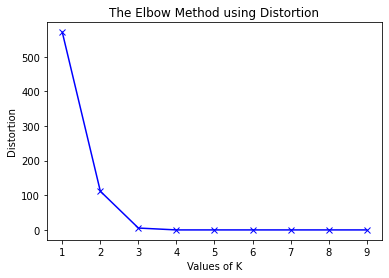

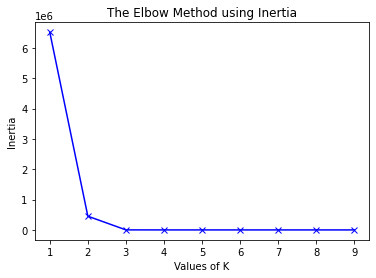



Elbow curves of mdata_3_1_trans are as follows:
Distortion Values:
1 : 822.6774843841238
2 : 263.0598537152418
3 : 12.74754878398196
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0

Inertia Values:
1 : 13651375.0
2 : 2512750.0
3 : 6500.0
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0


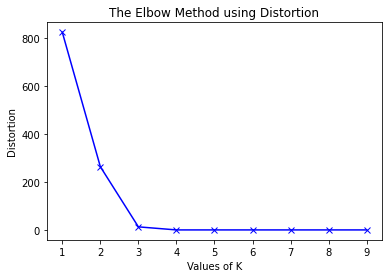

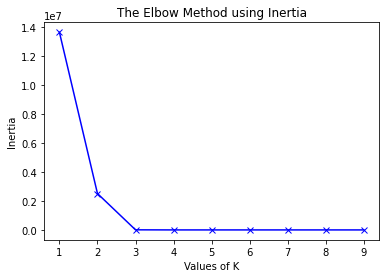



Elbow curves of mdata_2_1_trans are as follows:
Distortion Values:
1 : 393.08475549173886
2 : 0.0
3 : 0.0
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0

Inertia Values:
1 : 3090312.5
2 : 0.0
3 : 0.0
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0


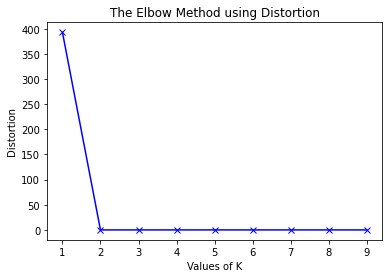

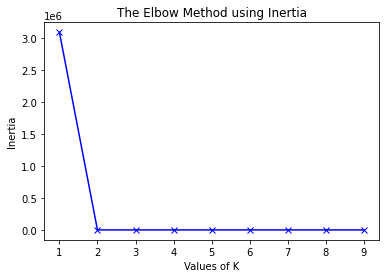



Elbow curves of mdata_1_trans are as follows:
Distortion Values:
1 : 497.51884386423006
2 : 0.0
3 : 0.0
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0

Inertia Values:
1 : 4950500.0
2 : 0.0
3 : 0.0
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0


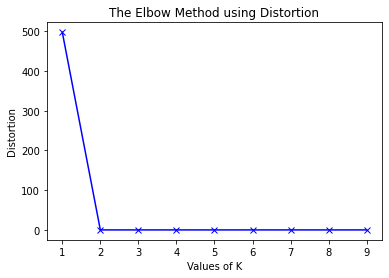

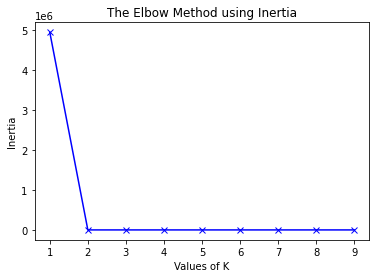



Elbow curves of rdata_daily_trans are as follows:
Distortion Values:
1 : 8844656.77585766
2 : 7073924.215067062
3 : 6246032.308339245
4 : 5871408.3620965965
5 : 5623829.633247041
6 : 5324204.091866032
7 : 5148998.135792097
8 : 5013881.94997141
9 : 4869546.645170278

Inertia Values:
1 : 3.710226699981823e+16
2 : 2.196535732754648e+16
3 : 1.694508907201236e+16
4 : 1.4818962176457088e+16
5 : 1.3189616595899804e+16
6 : 1.2152275030912992e+16
7 : 1.1334823396037844e+16
8 : 1.0490465671894004e+16
9 : 9855835297333640.0


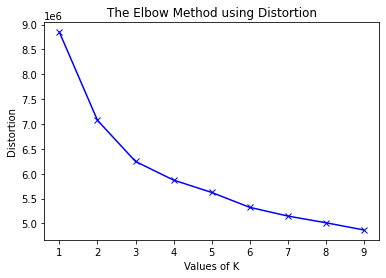

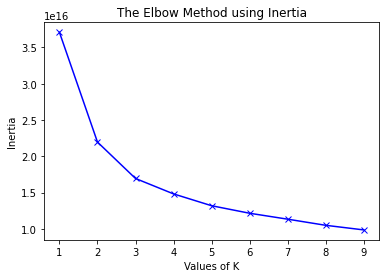



Elbow curves of rdata_hourly_trans are as follows:
Distortion Values:
1 : 9735079.945494784
2 : 8035898.817199355
3 : 7233525.84688244
4 : 6832807.489958875
5 : 6538674.03608411
6 : 6372988.214922028
7 : 6188700.906873044
8 : 5985533.299372855
9 : 5861533.553636801

Inertia Values:
1 : 1.0641995127604342e+18
2 : 6.70380455080838e+17
3 : 5.408784498043963e+17
4 : 4.7722749058450534e+17
5 : 4.407665659257048e+17
6 : 4.1075056429839136e+17
7 : 3.871607120899589e+17
8 : 3.671475575913018e+17
9 : 3.530859182672497e+17


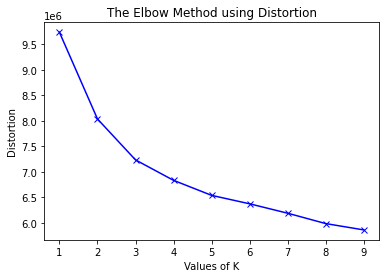

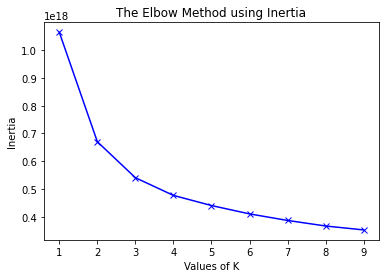

In [10]:
# Define distortion and inertia above this cell. Use info that is available on geeksforgeeks

# Declaring lists that will capture the values of distortion and inertia
distortions = []
inertias = []

# Declaring dictionaries that will map the values of k and distortion, inertia values respectively
mapping1 = {}
mapping2 = {}

# Value of K will range from 1 to 10
K = range(1, 10)

# For all the transformed pandas dataframes, elbow curve plots will be printed in the following loop.
for i in trans_data_saved:  
  for k in K:
      # Building and fitting the model
      kmeanModel = KMeans(n_clusters=k).fit(trans_data_saved[i])
      kmeanModel.fit(trans_data_saved[i])

      # Values of distortion will be appended to the list declared above
      distortions.append(sum(np.min(cdist(trans_data_saved[i], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / trans_data_saved[i].shape[0])
      # Values of inertia will be appended to the list declared above
      inertias.append(kmeanModel.inertia_)

      # The below two lines of code will handle the mapping of k with distortion and inertia values.
      mapping1[k] = sum(np.min(cdist(trans_data_saved[i], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / trans_data_saved[i].shape[0]
      mapping2[k] = kmeanModel.inertia_
  print()
  print('Elbow curves of', i, 'are as follows:')
  print('Distortion Values:')
  for key, val in mapping1.items():
      print(f'{key} : {val}')    
  print()
  print('Inertia Values:')
  for key, val in mapping2.items():
      print(f'{key} : {val}')

  # The below lines of code will generate plots with the distortion values
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method using Distortion')
  plt.show()

  # The below lines of code will generate plots with the inertia values
  plt.plot(K, inertias, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()
  print()
  distortions = []
  inertias = []  
  mapping1 = {}
  mapping2 = {}

In [11]:
# Fit and Evaluate functions with PCA as a parameter (Luke, 2022)

def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))
    

class KMeans:
    def __init__(self, n_clusters, max_iter=500):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, xarray_data, PCA = True, pass_trans_data = True):

      ''' This function fits the K-means model to the data that is passed to it.
          Parameters that this function will accept are as follows:
          1. xarray_data = string of the name of the original xarray file
          2. PCA (bool) = whether or not PCA has to be applied. Default value is True
          3. pass_trans_data (bool) = whether saved data has to be passed. If False, data will be transformed instantly. Default value is True.'''

      # The following block will run if user wants PCA to be applied to the data
      if PCA == True:
        # The following code will be executed if the user wants the saved transformed dataframe to be considered.
        if pass_trans_data == True:
          k = list(locals().values()) # k will be the list which holds the values of the parameters that are being passed to the function
          path = str(k[1]) # path will hold the first parameter's value
          fullpath = os.path.join("/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/" + path + ".csv")

          X_train = pd.read_csv(fullpath, index_col=[0]) # saved transformed dataframe will be read
          X_train = datanormalization(X_train) # the data will be normalized
          X_train = np.array(PCA_transform(X_train)) # X_train in the form of a numpy array will hold the data to which PCA has been applied 

        

          ''' Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first point,
              then the rest are initialized with probabilities proportional to their distances to the first point.'''
          
          # Pick a random point from train data for first centroid
          self.centroids = [random.choice(X_train)]

          for _ in range(self.n_clusters-1):
              # Calculate distances from points to the centroids
              dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
              # Normalize the distances
              dists /= np.sum(dists)
              # Choose remaining points based on their distances
              new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
              self.centroids += [X_train[new_centroid_idx]]

          iteration = 0 # setting iteration to 0
          prev_centroids = None # setting prev_centroids to None

          while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
              # Sort each datapoint, and assign it to the nearest centroid
              sorted_points = [[] for _ in range(self.n_clusters)]
              for x in X_train:
                  dists = euclidean(x, self.centroids) # Calling the function defined above
                  centroid_idx = np.argmin(dists) # Assigning points to the nearest centroid
                  sorted_points[centroid_idx].append(x)
              # Push current centroids to previous, reassign centroids as mean of the points belonging to them
              prev_centroids = self.centroids
              self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
              for i, centroid in enumerate(self.centroids):
                  if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                      self.centroids[i] = prev_centroids[i]
              iteration += 1

        # If the user does not want the saved transformed data to be used, the below block of code will be executed    
        else:
          X_train = datatransformation(xarray_data) # Transforming the data
          X_train = datanormalization(X_train) # Normalizing the data
          X_train = np.array(PCA_transform(X_train)) # Applying PCA to the data and storing it in the form of a numpy array

          ''' Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first point,
              then the rest are initialized with probabilities proportional to their distances to the first point.'''
          
          # Pick a random point from train data for first centroid
          self.centroids = [random.choice(X_train)]
          for _ in range(self.n_clusters-1):
              # Calculate distances from points to the centroids
              dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
              # Normalize the distances
              dists /= np.sum(dists)
              # Choose remaining points based on their distances
              new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
              self.centroids += [X_train[new_centroid_idx]]

          iteration = 0 # setting iteration to 0
          prev_centroids = None # setting prev_centroids to None

          while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
              # Sort each datapoint, and assign it to the nearest centroid
              sorted_points = [[] for _ in range(self.n_clusters)]
              for x in X_train:
                  dists = euclidean(x, self.centroids) # Calling the function defined above
                  centroid_idx = np.argmin(dists) # Assigning points to the nearest centroid
                  sorted_points[centroid_idx].append(x)
              # Push current centroids to previous, reassign centroids as mean of the points belonging to them
              prev_centroids = self.centroids
              self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
              for i, centroid in enumerate(self.centroids):
                  if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                      self.centroids[i] = prev_centroids[i]
              iteration += 1      

      # If the user does not want PCA to be applied to the data, the below block of code will be executed
      else:
        # The following code will be executed if the user wants the saved transformed dataframe to be considered.
        if pass_trans_data == True:
          k = list(locals().values()) # k will be the list which holds the values of the parameters that are being passed to the function
          path = str(k[1]) # path will hold the first parameter's value
          fullpath = os.path.join("/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/" + path + ".csv")

          X_train = pd.read_csv(fullpath, index_col=[0]) # saved transformed dataframe will be read
          X_train = np.array(datanormalization(X_train)) # the data will be normalized and stored in the form of a numpy array

          ''' Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first point,
          # then the rest are initialized with probabilities proportional to their distances to the first point. '''
          
          # Pick a random point from train data for first centroid
          self.centroids = [random.choice(X_train)]
          for _ in range(self.n_clusters-1):
              # Calculate distances from points to the centroids
              dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
              # Normalize the distances
              dists /= np.sum(dists)
              # Choose remaining points based on their distances
              new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
              self.centroids += [X_train[new_centroid_idx]]

          iteration = 0 # setting iteration to 0
          prev_centroids = None # setting prev_centroids to None

          while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
              # Sort each datapoint, and assign it to the nearest centroid
              sorted_points = [[] for _ in range(self.n_clusters)]
              for x in X_train:
                  dists = euclidean(x, self.centroids) # Calling the function defined above
                  centroid_idx = np.argmin(dists) # Assigning points to the nearest centroid
                  sorted_points[centroid_idx].append(x)
              # Push current centroids to previous, reassign centroids as mean of the points belonging to them
              prev_centroids = self.centroids
              self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
              for i, centroid in enumerate(self.centroids):
                  if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                      self.centroids[i] = prev_centroids[i]
              iteration += 1

        # If the user does not want the saved transformed data to be used, the below block of code will be executed        
        else:
          X_train = datatransformation(xarray_data) # Transforming the data
          X_train = np.array(datanormalization(X_train)) # Normalizing the data and storing it in the form of a numpy array

          ''' Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first point,
           then the rest are initialized w/ probabilities proportional to their distances to the first point.'''

          # Pick a random point from train data for first centroid
          self.centroids = [random.choice(X_train)]
          for _ in range(self.n_clusters-1):
              # Calculate distances from points to the centroids
              dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
              # Normalize the distances
              dists /= np.sum(dists)
              # Choose remaining points based on their distances
              new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
              self.centroids += [X_train[new_centroid_idx]]

          iteration = 0 # setting iteration to 0
          prev_centroids = None # setting prev_centroids to None

          while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
              # Sort each datapoint, assign it to the nearest centroid
              sorted_points = [[] for _ in range(self.n_clusters)]
              for x in X_train:
                  dists = euclidean(x, self.centroids)
                  centroid_idx = np.argmin(dists)
                  sorted_points[centroid_idx].append(x)
              # Push current centroids to previous, reassign centroids as mean of the points belonging to them
              prev_centroids = self.centroids
              self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
              for i, centroid in enumerate(self.centroids):
                  if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                      self.centroids[i] = prev_centroids[i]
              iteration += 1


    def evaluate(self, z, PCA = True, pass_trans_data = True):
      ''' This function evaluates and assigns data points to clusters
          Parameters that this function will accept are as follows:
          1. z = string of the name of the original xarray file
          2. PCA (bool) = whether or not PCA has to be applied. Default value is True.
          3. pass_trans_data (bool) = whether saved data has to be passed. If False, data will be transformed instantly. Default value is True.'''
      
      # The following block of code will be executed if the user wants PCA to be applied to the data.
      if PCA == True:
        # The following code will be executed if the user wants the function to consider already saved transformed data.
        if pass_trans_data == True:
          k = list(locals().values()) # k will be the list that holds the values of all the parameters that are being passed to the function
          path = str(k[1]) # path will capture the value of the first parameter
          fullpath = os.path.join("/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/" + path + ".csv")

          X = pd.read_csv(fullpath,index_col=[0]) # Already saved transformed dataframe will be read
          Y = datanormalization(X) # Data will be normalized here
          Y = np.array(PCA_transform(Y)) # PCA will be applied to the data and stored as a numpy array.

          # Declaring empty lists that will later hold the values of class_center and classification (1d array output)
          centroid = []
          centroid_idx = []

          i=0
          for x in Y:
              dists = euclidean(x, self.centroids) # Calling the function defined earlier
              centroid_id = np.argmin(dists) # Assigning the points to their nearest centroid
              centroid.append(self.centroids[centroid_id]) # Appending the class_centers
              centroid_idx.append(centroid_id) # Appending the cluster labels

          # The following steps will save the transformed data so that it can be used for visualization at a later stage.
          # Converting the normalized data array into a pandas dataframe
          transformed_data = pd.DataFrame(Y, index=X.index)

          # Adding class centers and cluster numbers as columns to the dataframe
          transformed_data['clusterid'] = centroid_idx 

          # Rearranging the columns in the dataframe
          transformed_data = transformed_data[['clusterid']] #+ [c for c in transformed_data if c not in ['clusterid']]]
          transformed_data1 = transformed_data # Storing the data along with the index
          transformed_data = transformed_data.reset_index() # Resetting the index of the dataframe

          return centroid, centroid_idx, transformed_data

        # If the user does not want saved data to be considered by the function, the below block will be executed
        else:
          X = datatransformation(z) # Transforming the original data into a pandas dataframe
          Y = datanormalization(X) # Normalizing the transformed data
          Y = np.array(PCA_transform(Y)) # Applying PCA to the data and storing it as a numpy array

          # Declaring empty lists that will later hold the values of class_center and classification (1d array output)
          centroid = []
          centroid_idx = []
          i=0
          for x in Y:
              dists = euclidean(x, self.centroids) # Calling the function defined earlier
              centroid_id = np.argmin(dists) # Assigning the points to their nearest centroid
              centroid.append(self.centroids[centroid_id]) # Appending the class_centers
              centroid_idx.append(centroid_id) # Appending the cluster labels

          # The following steps will save the transformed data so that it can be used for visualization at a later stage.
          # Converting the normalized data array into a pandas dataframe
          transformed_data = pd.DataFrame(Y, index=X.index)

          # Adding class centers and cluster numbers as columns to the dataframe
          transformed_data['clusterid'] = centroid_idx

          # Rearranging the columns in the dataframe
          transformed_data = transformed_data[['clusterid']]# + [c for c in transformed_data if c not in ['clusterid']]]
          transformed_data1 = transformed_data
          transformed_data = transformed_data.reset_index()

          return centroid, centroid_idx, transformed_data

      # The following block of code will be executed if the user does not want PCA to be applied to the data.
      else:
        # If the user wants already saved transformed data to be considered, the below code will be executed.
        if pass_trans_data == True:
          k = list(locals().values()) # k will be the list that holds the values of all the parameters that are being passed to the function
          path = str(k[1]) # path will hold the value of the first parameter
          fullpath = os.path.join("/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/" + path + ".csv")

          X = pd.read_csv(fullpath,index_col=[0]) # Already saved transformed data will be read
          Y = np.array(datanormalization(X)) # The data will be normalized and saved as a numpy array.

          # Declaring empty lists that will later hold the values of class_center and classification (1d array output)
          centroid = []
          centroid_idx = []

          i=0
          for x in Y:
              dists = euclidean(x, self.centroids) # Calling the function defined earlier
              centroid_id = np.argmin(dists) # Assigning the points to their nearest centroid
              centroid.append(self.centroids[centroid_id]) # Appending the class_centers
              centroid_idx.append(centroid_id) # Appending the cluster labels

          # The following steps will save the transformed data so that it can be used for visualization at a later stage.
          # Converting the normalized data array into a pandas dataframe
          transformed_data = pd.DataFrame(Y, index=X.index)

          # Adding class centers and cluster numbers as columns to the dataframe
          # transformed_data['Class_Center'] = centroid
          transformed_data['clusterid'] = centroid_idx   

          # Rearranging the columns in the dataframe
          transformed_data = transformed_data[['clusterid']]# + [c for c in transformed_data if c not in ['clusterid']]]
          transformed_data1 = transformed_data
          transformed_data = transformed_data.reset_index()

          return centroid, centroid_idx, transformed_data

        # If the user does not want saved data to be considered by the function, the below block will be executed
        else:
          X = datatransformation(z) # Transforming the original data into a pandas dataframe
          Y = np.array(datanormalization(X)) # Normalizing the data and saving it as a numpy array

          # Declaring empty lists that will later hold the values of class_center and classification (1d array output)
          centroid = []
          centroid_idx = []
          i=0
          for x in Y:
              dists = euclidean(x, self.centroids) # Calling the function defined earlier
              centroid_id = np.argmin(dists) # Assigning the points to their nearest centroid
              centroid.append(self.centroids[centroid_id]) # Appending the class_centers
              centroid_idx.append(centroid_id) # Appending the cluster labels

          # The following steps will save the transformed data so that it can be used for visualization at a later stage.
          # Converting the normalized data array into a pandas dataframe
          transformed_data = pd.DataFrame(Y, index=X.index)

          # Adding cluster numbers as a column to the dataframe
          transformed_data['clusterid'] = centroid_idx

          # Rearranging the columns in the dataframe
          transformed_data = transformed_data[['clusterid']] #+ [c for c in transformed_data if c not in ['clusterid']]]
          transformed_data1 = transformed_data
          transformed_data = transformed_data.reset_index()              

          return centroid, centroid_idx, transformed_data

In [12]:
# Function to modify the dataframe returned by the evaluate function.
def modify_date(df):
  # This function will accept a dataframe as an input.

  # Since the dataframe returned by the evaluate function has date as a string, the following line will convert it to the specified date format.
  df['index'] = pd.to_datetime(df['index'], format='%Y-%m-%d') 

  df['year'] = (df['index'].dt.year).astype(str) # Creating a new column that will capture the year of the date
  df['day'] = (df['index'].dt.day_of_year-1).astype(str) # Creating a new column that will capture the daye of the year
  df['time_step'] = df['year']+'_'+df['day'] # Appending the two columns to the required format and saving it under 'time_step'

  df = df[['time_step'] + [c for c in df if c not in ['time_step']]] # Rearranging the columns
  # Dropping the columns 'index', 'year' and 'day
  df = df.drop(['index','year','day'], axis=1)
  return df

In [13]:
# Function that saves the modified dataframe

def save_df(df,df_name):
  # This function will accept a dataframe and its name as an input.

  # The following code will save the dataframe to the location specified below.
  path = '/content/drive/MyDrive/Courses/IS-700-Independent_Study/'+df_name+'.csv'
  df.to_csv(path,index=True)
  return

<a name="t8"></a>
# **8. Experiments: the results of the clustering algorithm with different datasets.**

<br>

>###### [Back to Table of Contents](#t0)

### **Mock_v4.nc**

In [14]:
centers = 3
kmeans = KMeans(n_clusters=centers)
kmeans.fit('mdata_4',PCA=True,pass_trans_data=True)

class_centers_mdata_4, classification_mdata_4, transformed_data_mdata_4 = kmeans.evaluate('mdata_4',PCA=True,pass_trans_data=True)
transformed_data_mdata_4 = modify_date(transformed_data_mdata_4)
save_df(transformed_data_mdata_4,'transformed_data_mdata_4')

classification_mdata_4

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]

### **Mock_v3.1.nc**

In [15]:
centers = 3
kmeans = KMeans(n_clusters=centers)
kmeans.fit('mdata_3_1',PCA=True,pass_trans_data=True)

class_centers_mdata_3_1, classification_mdata_3_1, transformed_data_mdata_3_1 = kmeans.evaluate('mdata_3_1',PCA=True,pass_trans_data=True)
transformed_data_mdata_3_1 = modify_date(transformed_data_mdata_3_1)
save_df(transformed_data_mdata_3_1,'transformed_data_mdata_3_1')

classification_mdata_3_1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]

### **Mock_v2.1.nc**

In [16]:
centers = 2
kmeans = KMeans(n_clusters=centers)
kmeans.fit('mdata_2_1',PCA=True,pass_trans_data=True)

class_centers_mdata_2_1, classification_mdata_2_1, transformed_data_mdata_2_1 = kmeans.evaluate('mdata_2_1',PCA=True,pass_trans_data=True)
transformed_data_mdata_2_1 = modify_date(transformed_data_mdata_2_1)
save_df(transformed_data_mdata_2_1,'transformed_data_mdata_2_1')

classification_mdata_2_1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### **Mock_v1.nc**

In [17]:
centers = 2
kmeans = KMeans(n_clusters=centers)
kmeans.fit('mdata_1',PCA=True,pass_trans_data=True)

class_centers_mdata_1, classification_mdata_1, transformed_data_mdata_1 = kmeans.evaluate('mdata_1',PCA=True,pass_trans_data=True)
transformed_data_mdata_1 = modify_date(transformed_data_mdata_1)
save_df(transformed_data_mdata_1,'transformed_data_mdata_1')

classification_mdata_1

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### **ERA5_meteo_sfc_2021_daily.nc**

In [18]:
centers = 3
kmeans = KMeans(n_clusters=centers)
kmeans.fit('rdata_daily',PCA=True,pass_trans_data=True)

class_centers_rdata_daily, classification_rdata_daily, transformed_data_rdata_daily = kmeans.evaluate('rdata_daily',PCA=True,pass_trans_data=True)
transformed_data_rdata_daily = modify_date(transformed_data_rdata_daily)
save_df(transformed_data_rdata_daily,'transformed_data_rdata_daily')

classification_rdata_daily

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


### **ERA5_meteo_sfc_2021_hourly.nc**

In [20]:
centers = 3
kmeans = KMeans(n_clusters=centers)
kmeans.fit('rdata_hourly',PCA=True,pass_trans_data=True)

class_centers_rdata_hourly, classification_rdata_hourly, transformed_data_rdata_hourly = kmeans.evaluate('rdata_hourly',PCA=True,pass_trans_data=True)
transformed_data_rdata_hourly = modify_date(transformed_data_rdata_hourly)
save_df(transformed_data_rdata_hourly,'transformed_data_rdata_hourly')

classification_rdata_hourly

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


<a name="t9"></a>
# **9. Result Evaluation:**

<br>

>###### [Back to Table of Contents](#t0)

## **Root Mean Squared Error**

<p align="justify">
Root Mean Squared Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. However, in this particular project, we're working on an unsupervised machine learning algorithm where the standard usage of RMSE does not apply. For this project, we've used RMSE for a totally different purpose. We've divided the function into two parts:<br><br>
i) Intra RMSE score and<br>
ii) Inter RMSE score.
<p align="justify"><br>
The first part is used to determine the RMSE between data points that belong to the same cluster. While the latter i.e., Inter RMSE score is used to determine the distance between the different clusters formed. Although it is an unorthodox way of using this evaluation technique, we've observed that the obtained results have contributed to the findings of this project.<br><br>
<p align="justify">
Since the users have the option of selecting whether or not they want the data to be transformed, we've built two sets of functions that deal with both the cases separately.
<p>

### RMSE - Non-normalized functions





In [21]:
# Non-normalized

''' The below function creates a dictionary that holds the values of all the dates that belong to a particular cluster.  
    The function takes in the original xarray dataset and the clustering output result as the input and generates a dictionary wherein the keys are dynamically generated to hold
    the dates of days that belong to a particular cluster.'''

def get_datewise_clusters(input,formed_clusters):
  ''' The parameters accepted by this function are as follows:
    1. Name of the xarray file as string
    2. 1-d array that has the clustering results'''

  Dates_Cluster = {} # declaring a dictionary
  input1 = data[input] # This line will fetch the actual xarray data file from the 'data' dictionary based on the name that is passed as input.
  input = input+'_trans' # This is how the data is stored in the trans_data_saved dictionary
  transdata = trans_data_saved[input] # transdata will hold the saved transformed data for the given input
  transdata['Cluster'] = formed_clusters # Adding a column called cluster that will hold the clustering results.
  transdata = transdata[['Cluster'] + [c for c in transdata if c not in ['Cluster']]] # Rearranging the columns
  transdata1 = transdata # Saving the transformed data along with the index
  transdata = transdata.reset_index() # Resetting the index

  # Iterating over the distinct values of the clusters formed
  for i in set(formed_clusters):
    # All the dates (index in this case) that have a specific cluster id will go into the dictionary as a list against the specific key
    # Every key in the dictionary will have a list as its value, where the list will hold the dates that belong to a specific cluster
    Dates_Cluster['Dates_Cluster'+str(i)] = transdata.index[transdata.Cluster == i].to_list()

  # The final dictionary will all the keys and their respective lists (as values) will be returned.
  return Dates_Cluster

In [22]:
# Non-normalized

''' While the function get_datewise_clusters returns a dictionary that holds the dates of all the days that belong to a particular cluster,
    the below function creats a dictionary that holds the entire data of all the days that belong to a particular cluster. 
    The data of all the days are first appended to a list and the entire list is converted to an array and appended to the dictionary that will have keys that are dynamically 
    generated and refer to all the clusters formed.'''

def n_nor_get_clusters(input,formed_clusters):
  ''' The parameters accepted by this function are as follows:
    1. Name of the xarray file as string
    2. 1-d array that has the clustering results'''

     
  com_arr = [] # Declaring a list that will hold every variable's data for a single day
  Clusters = {} # Declaring a dictionary that will hold the entire data of all days, based on the cluster number
  input1 = data[input] # This line will fetch the actual xarray data file from the 'data' dictionary based on the name that is passed as input.
  Dates_Cluster = get_datewise_clusters(input,formed_clusters) # Calling the function declared earlier

  # For all the distinct cluster numbers in the 1-d array (clustering results)
  for i in set(formed_clusters):
    # For each day in the specific Dates_Cluster
    for j in Dates_Cluster['Dates_Cluster'+str(i)]:
      arr = np.array(input1.isel(time=j).to_array()) # A single day's data of all the variables will be stored in arr in the form of a numpy array
      com_arr.append(arr) # arr is appended to the list 'com_arr'
    Clusters['Cluster' + str(i)] = np.array(com_arr) # One key in the dictionary will hold the entire data of all the days that belong to a specific cluster id
    com_arr = [] # com_arr is reset

  # This dictionary is returned.    
  return Clusters    

In [23]:
# Non-normalized

''' Based on the dictionary that the function n_nor_get_clusters returns, the below function creates a dictionary that will hold all the cluster centers.
    The dictionary will have keys that are dynamically generated, and will hold the cluster centers based on the cluster id.'''

def n_nor_get_cluster_centers(input,formed_clusters):
  ''' The parameters accepted by this function are as follows:
    1. Name of the xarray file as string
    2. 1-d array that has the clustering results'''


  Cluster_Centers = {} # Declaring a dictionary that will hold the cluster_centers for every cluster formed
  input1 = data[input] # This line will fetch the actual xarray data file from the 'data' dictionary based on the name that is passed as input.
  Clusters = n_nor_get_clusters(input,formed_clusters) # Calling the function defined earlier

  # For all the distinct cluster numbers in the 1-d array (clustering results)
  for i in set(formed_clusters):
    Cluster_Centers['Cluster_Center' + str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0) # Mean of the cluster is computed and stored against the specific key.

  # This dictionary is returned.
  return Cluster_Centers

In [24]:
# Non-normalized 

''' The below function is used to calculate the Intra RMSE Scores for every cluster that is formed. 
    For each cluster, the distance between every point and the cluster center is calculated, squared and added. The resulting score is then divided by the number of points in 
    the cluster and square root is applied. This generates the intra RMSE score. The final output of the function will be in the form of a list that will hold the intra RMSE 
    scores of each and every cluster that is formed.'''
    
def n_nor_intra_rmse(input,formed_clusters):
  ''' The parameters accepted by this function are as follows:
    1. Name of the xarray file as string
    2. 1-d array that has the clustering results'''

  
  sq_diff = []
  intra_rmse = []
  input1 = data[input] # This line will fetch the actual xarray data file from the 'data' dictionary based on the name that is passed as input.
  Clusters = n_nor_get_clusters(input,formed_clusters) # Dictionary that holds the data of all the clusters formed
  Cluster_Centers = n_nor_get_cluster_centers(input,formed_clusters)  # Dictionary that holds the cluster centers of every cluster formed

  # For all the clusters that have been formed
  for i in range(len(Clusters)):
    # For all the points that belong to cluster i
    for j in range(len(Clusters['Cluster' + str(i)])):
      diff = Clusters['Cluster' + str(i)][j] - Cluster_Centers['Cluster_Center' + str(i)] # Distance between each point and the cluster center is determined
      Sq_diff = (diff**2) # The distance is squared
      sq_diff.append(Sq_diff) # The squared distance is appended to the list sq_diff
    Sq_diff_sum = sum(sq_diff) # This variable will hold the sum of all the squared distances
    sq_diff = [] # sq_diff is reset to an empty list again
    n = len(Clusters['Cluster' + str(i)]) # The number of points within a cluster
    Sqrt_diff_sum = np.sqrt(sum(sum(sum(Sq_diff_sum/n)))) # RMSE within a particular cluster is determined here.
    intra_rmse.append(Sqrt_diff_sum) # The RMSE score is appended to intra_rmse

  # The list with all the RMSE scores is returned    
  return intra_rmse

In [25]:
# Non-normalized

''' The below function handles missing values in a xarray data file by replacing them with the mean of every variable that is present in the file.
    It then returns the xarray file that does not have any missing values.'''

def handle_missing_values(input):
  # This function takes the xarray file as an input
  var_mean = {}
  # For all the variables within the file
  for i in input.data_vars:
    # If the number of missing values is greater than 0
    if input[i].isnull().sum().item() > 0:
      var_mean[str(i) + '_mean'] = input[i].mean().item() # Computing the mean of the variable within the data
      input[i] = input[i].fillna(var_mean[str(i) + '_mean']) # Filling the missing values with the computed mean

  # The xarray data file without missing values is returned      
  return input

### RMSE - Normalized functions

In [26]:
# Normalized

''' The below function creates two dictionaries, Clusters and Cluster_Centers, that  will hold the clusters and their cluster centers respectively.
    Since we're dealing with normalized data here, all the operations will be performed on the transformed data. '''

def nor_get_clusters_and_centers(input,formed_clusters):
  ''' The parameters accepted by this function are as follows:
      1. Name of the xarray file as string
      2. 1-d array that has the clustering results'''
  
  # Declaring two dictionaries that will hold the clusters and cluster centers.
  Clusters = {}
  Cluster_Centers = {}

  # For all the distinct cluster numbers in the 1-d array (clustering results)
  for i in set(formed_clusters):
    Clusters['Cluster' + str(i)] = np.array(input[input.Cluster == i].drop(columns=['Cluster'])) # data of every cluster are captured into this dictionary
    Cluster_Centers['Cluster_Center' + str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0) # cluster centers of every cluster are captured into this dictionary

  # Both the dictionaries are returned
  return Clusters,Cluster_Centers

In [27]:
# Normalized

''' The below function is used to calculate the Intra RMSE Scores for every cluster that is formed. It uses the function nor_get_clusters_and_centers to get the clusters as
    well as thier centers. For each cluster, the distance between every point and the cluster center is calculated, squared and added. The resulting score is then divided by
    the number of points in the cluster and square root is applied. This generates the intra RMSE score. The final output of the function will be in the form of a list that 
    will hold the intra RMSE scores of each and every cluster that is formed.'''

def nor_intra_rmse(input,formed_clusters):
  ''' The parameters accepted by this function are as follows:
    1. Name of the xarray file as string
    2. 1-d array that has the clustering results'''

  intra_rmse = []
  sq_diff = []
  Clusters,Cluster_Centers = nor_get_clusters_and_centers(input,formed_clusters) # Calling a function to get clusters and cluster centers

  # For all the clusters that have been formed
  for i in range(len(Clusters)):
    # For all the points within cluster i
    for j in range(len(Clusters['Cluster' + str(i)])):
      diff = Clusters['Cluster' + str(i)][j] - Cluster_Centers['Cluster_Center' + str(i)] # Difference between a point and the cluster center
      Sq_diff = (diff**2) # Square of the distance
      sq_diff.append(Sq_diff) # The difference sqare is appended to the list sq_diff
    Sq_diff_sum = sum(sum(sq_diff)) # This holds the value of the sum of all the differences between all the points and the cluster center
    sq_diff = [] # Resetting sq_diff to an empty list
    n = len(Clusters['Cluster' + str(i)]) # Number of points within each cluster
    Sqrt_diff_sum = np.sqrt(Sq_diff_sum/n) # RMSE within a particular cluster is determined here.
    intra_rmse.append(Sqrt_diff_sum) # The RMSE score is appended to intra_rmse.
  return intra_rmse

In [28]:
# Main function of Root Mean Suared Error (Moody, 2019)

''' The below function is used to print both, intra and inter RMSE scores of all the clusters that have been formed. While the functions that determine the intra RMSE scores of
    both normalized and non-normalized data have been declared above, the steps that calculate the inter RMSE scores have not been declared. This function returns a dataframe
    that showcases the intra RMSE scores of every cluster as well as the inter RMSE scores between each cluster. To get the inter RMSE score between two clusters, the distance
    between the clusters centers of both the clusters is computed, squared, added, and square root is applied.  
    
    **Note:** If the user opts not to normalize the data, then the parameters "pass_trans_data" and "PCA" are set to False by default because PCA is being applied only on 
    the transformed data.

    '''

def RMSE(input,formed_clusters,normalize=False,pass_trans_data=False,PCA=False):
  ''' The parameters accepted by this function are as follows:
    1. Name of the xarray file as string
    2. 1-d array that has the clustering results
    3. Normalize (bool) = whether or not the data has to be normalized. Default value is False
    4. pass_trans_data (bool) = whether or not saved transformed data has to be passed. Default value is True
    5. PCA (bool) = whether or not PCA has to be applied. Default value is False.'''

  inter_rmse = []
  avg_cluster = {}
  input1 = data[input] # This line fetches the actual xarray data file from the 'data' dictionary that was defined at the bery beginning.

  # If the user does not want the data to be normalized, the below block of code is executed
  if normalize == False:
    input1 = handle_missing_values(input1) # This line handles any missing data in the data file.
    Clusters = n_nor_get_clusters(input,formed_clusters) # A function that was earlier defined is called to get the clusters in the data
    mat = pd.DataFrame(columns=range(len(Clusters)),index=range(len(Clusters))) # mat is a dataframe having the total number of clusters as both, the rows and columns.
    # For all the clusters that have been formed
    for i in range(len(Clusters)):
      # Cluster centers are determined using the below line and stored in the 'avg_cluster' dictionary.
      avg_cluster['avg_cluster'+str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0)
    # For all the clusters that have been formed
    for i in range(len(Clusters)):
      # For all the clusters that have been formed
      for j in range(len(Clusters)):
        if i == j:
          # Intra RMSE function is called if i and j take the same cluster id
          a = n_nor_intra_rmse(input,formed_clusters)
          # Values are entered in the dataframe 'mat'
          mat[i].iloc[j] = round(a[i],2) # Values are rounded to two decimal points
         
         # If i and j do not have the same value, inter RMSE is calculated 
        else:
          diff = avg_cluster['avg_cluster' + str(i)] - avg_cluster['avg_cluster' + str(j)] # Difference between both the cluster centers
          Sq_diff = (diff**2) # Difference is then sqaured
          Sq_diff_sum = sum(sum(sum(Sq_diff))) # This holds the value of sum of all the differences
          n = len(avg_cluster['avg_cluster'+str(i)][0]) 
          Sqrt_diff_sum = np.sqrt(Sq_diff_sum/n) # Final RMSE score is computed here.
          mat[i].iloc[j] = round(Sqrt_diff_sum,2) # Scores are assigned to their respective positions
    return mat       

  # If the user wants the data to be normalized, the below code is executed
  else:
    # If the user wants PCA to be applied, the following code is executed
    if PCA == True:
      # IF the user wants saved transformed data to be considered, the below code is executed
      if pass_trans_data == True:
        k = list(locals().values()) # k is a list which holds the values of all the parameters that are passed to the function
        path = str(k[0]) # path holds the first parameter's value
        fullpath = os.path.join("/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/" + path + ".csv") 
        X = pd.read_csv(fullpath,index_col=[0]) # Saved transformed file is read
        Y = datanormalization(X) # The data is normalized
        Y = PCA_transform(Y) # PCA is applied to the data

        Y['Cluster'] = formed_clusters # Adding a new column to the data which the clustering results
        Y = Y[['Cluster'] + [c for c in Y if c not in ['Cluster']]] # Rearranging the columns of the dataframe
  
        Clusters, Cluster_Centers = nor_get_clusters_and_centers(Y,formed_clusters) # Function to get clusters and cluster centers is called
  
        mat = pd.DataFrame(columns=range(len(Clusters)),index=range(len(Clusters))) # mat is a dataframe having the total number of clusters as both, the rows and columns.
        # For all the clusters that have been formed
        for i in range(len(Clusters)):
          # Cluster center is computed at this stage
          avg_cluster['avg_cluster'+str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0)
        # For all the clusters that have been formed
        for i in range(len(Clusters)):
          # For all the clusters that have been formed
          for j in range(len(Clusters)):
            # If i and j refer to the same cluster
            if i == j: 
              a = nor_intra_rmse(Y,formed_clusters) # Intra RMSE function is called
              mat[i].iloc[j] = round(a[i],2) # Respective scores are entered in the dataframe
            # If i and j do not refer to the same cluster
            else:
              diff = avg_cluster['avg_cluster' + str(i)] - avg_cluster['avg_cluster' + str(j)] # Difference between the two cluster centers is computed
              Sq_diff = (diff**2) # The difference is squared
              Sq_diff_sum = sum(Sq_diff) # This variable holds the sum of the distance sqaure
              Sqrt_diff_sum = np.sqrt(Sq_diff_sum) # RMSE score is determined here
              mat[i].iloc[j] = round(Sqrt_diff_sum,2) # Scores are entered to their respective positions
        return mat

      # If the user does not want saved transformed data to be considered, the below block is executed
      else:
        transformed_data = datatransformation(input1) # The actual xarray file is transformed to a pandas dataframe

        # Data Normalization
        transformed_data = datanormalization(transformed_data) # The transformed data is normalized

        # Applying PCA
        transformed_data = PCA_transform(transformed_data) # PCA is applied to the normalized data

        # Adding cluster numbers as a column to the dataframe
        transformed_data['Cluster'] = formed_clusters

        # Rearranging the columns in the dataframe
        transformed_data = transformed_data[['Cluster'] + [c for c in transformed_data if c not in ['Cluster']]]
  
        Clusters, Cluster_Centers = nor_get_clusters_and_centers(transformed_data,formed_clusters) # Function to get the clusters and their centers is called
  
        mat = pd.DataFrame(columns=range(len(Clusters)),index=range(len(Clusters))) # mat is a dataframe having the total number of clusters as both, the rows and columns.
        # For all the clusters that have been formed
        for i in range(len(Clusters)):
          avg_cluster['avg_cluster'+str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0) # Cluster center is determined here
        # For all the clusters that have been formed
        for i in range(len(Clusters)):
          # For all the clusters that have been formed
          for j in range(len(Clusters)):
            # If i and j refer to the same cluster
            if i == j:
              a = nor_intra_rmse(transformed_data,formed_clusters) # Intra RMSE function is called
              mat[i].iloc[j] = round(a[i],2) # Intra RMSE scores are entered in their respective positions
            # If i and j refer to two different clusters
            else:
              diff = avg_cluster['avg_cluster' + str(i)] - avg_cluster['avg_cluster' + str(j)] # Difference between the two cluster centers is computed
              Sq_diff = (diff**2) # The distance is squared
              Sq_diff_sum = sum(Sq_diff) # This variable holds the sum of the squared distance
              Sqrt_diff_sum = np.sqrt(Sq_diff_sum) # RMSE score is determined here
              mat[i].iloc[j] = round(Sqrt_diff_sum,2) # Inter RMSE scores are entered to their respective positions

        return mat

    # If the user does not want PCA to be applied, the below code is executed
    else:
      # If the user wants saved transformed data to be considered, the below code is run
      if pass_trans_data == True:
        k = list(locals().values()) # k is a list which holds the values of the parameters that are passed to the function
        path = str(k[0]) # path holds the value of the first parameter
        fullpath = os.path.join("/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/" + path + ".csv")
        X = pd.read_csv(fullpath,index_col=[0]) # Saved transformed file is read
        Y = datanormalization(X) # The data is normalized

        Y['Cluster'] = formed_clusters # Adding a new column to the dataframe with the clustering results
        Y = Y[['Cluster'] + [c for c in Y if c not in ['Cluster']]] # Rearranging the columns of the dataframe
  
        Clusters, Cluster_Centers = nor_get_clusters_and_centers(Y,formed_clusters) # Function to get the clusters and their centers is called

        mat = pd.DataFrame(columns=range(len(Clusters)),index=range(len(Clusters))) # mat is a dataframe having the total number of clusters as both, the rows and columns.
        # For all the clusters that have been formed
        for i in range(len(Clusters)):
          # Cluster centers are computed and added to the dictionary
          avg_cluster['avg_cluster'+str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0)
        # For all the clusters that have been formed
        for i in range(len(Clusters)):
          # For all the clusters that have been formed
          for j in range(len(Clusters)):
            # If i and j refer to the same cluster
            if i == j:
              a = nor_intra_rmse(Y,formed_clusters) # Intra RMSE function is called
              mat[i].iloc[j] = round(a[i],2) # Intra RMSE scores are entered to their respective places
            # If i and j do not refer to the same cluster
            else:
              diff = avg_cluster['avg_cluster' + str(i)] - avg_cluster['avg_cluster' + str(j)] # Distance between their cluster centers is computed
              Sq_diff = (diff**2) # The distance is squared
              Sq_diff_sum = sum(Sq_diff) # This variable holds the sum of the squared distances
              Sqrt_diff_sum = np.sqrt(Sq_diff_sum) # Inter RMSE score is computed here
              mat[i].iloc[j] = round(Sqrt_diff_sum,2) # Inter RMSE scores are entered to their respective places
        return mat

      # If the user does not want saved transformed data to be considered, the below block is executed
      else:
        transformed_data = datatransformation(input1) # The xarray file is transformed to a pandas dataframe

        # Data Normalization
        transformed_data = datanormalization(transformed_data) # The transformed data is normalized

        # Adding cluster number as a column to the dataframe
        transformed_data['Cluster'] = formed_clusters

        # Rearranging the columns in the dataframe
        transformed_data = transformed_data[['Cluster'] + [c for c in transformed_data if c not in ['Cluster']]]
  
        Clusters, Cluster_Centers = nor_get_clusters_and_centers(transformed_data,formed_clusters) # Function to get the clusters and their centers is called

        mat = pd.DataFrame(columns=range(len(Clusters)),index=range(len(Clusters))) # mat is a dataframe having the total number of clusters as both, the rows and columns.
        # For all the clusters that have been formed
        for i in range(len(Clusters)):
          # Cluster centres are computed
          avg_cluster['avg_cluster'+str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0)
        # For all the clusters that have been formed
        for i in range(len(Clusters)):
          # For all the clusters that have been formed
          for j in range(len(Clusters)):
            # If i and j refer to the same cluster
            if i == j:
              a = nor_intra_rmse(transformed_data,formed_clusters) # Intra RMSE function is called
              mat[i].iloc[j] = round(a[i],2) # Intra RMSE scores are entered to their respective places
            # If i and j do not refer to the same cluster
            else:
              diff = avg_cluster['avg_cluster' + str(i)] - avg_cluster['avg_cluster' + str(j)] # Difference between their cluster centers is calculated
              Sq_diff = (diff**2) # The difference is squared
              Sq_diff_sum = sum(Sq_diff) # This variable holds the sum of all the squared distances
              Sqrt_diff_sum = np.sqrt(Sq_diff_sum) # Inter RMSE score is determined here
              mat[i].iloc[j] = round(Sqrt_diff_sum,2) # Inter RMSE scores are entered to their respective places

        return mat


## **Silhouette Score**

<p align="justify">
Silhouette analysis can be used to study the separation distance between the resulting clusters.<br><br>
Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
</p>

In [29]:
def silhouette_score1(X, labels, pass_trans_data = True, *, metric="euclidean", sample_size=None, random_state=None, **kwds):
   if pass_trans_data == True:
          k = list(locals().values()) # k will be the list which holds the values of the parameters that are being passed to the function
          path = str(k[0]) # path will hold the first parameter's value
          fullpath = os.path.join("/content/drive/MyDrive/Courses/IS-700-Independent_Study/Transformed_data/" + path + ".csv")

          X1 = pd.read_csv(fullpath, index_col=[0]) # saved transformed dataframe will be read
          X1 = datanormalization(X1) # the data will be normalized

          if sample_size is not None:
            X1, labels = check_X_y(X1, labels, accept_sparse=["csc", "csr"])
            random_state = check_random_state(random_state)
            indices = random_state.permutation(X1.shape[0])[:sample_size]
            if metric == "precomputed":
              X1, labels = X1[indices].T[indices].T, labels[indices]
            else:
              X1, labels = X1[indices], labels[indices]
          return np.mean(silhouette_samples(X1, labels, metric=metric, **kwds))
   
   else:
     X1 = data[X]
     X1 = datatransformation(X)
     X1 = datanormalization(X1)   
     if sample_size is not None:
        X1, labels = check_X_y(X1, labels, accept_sparse=["csc", "csr"])
        random_state = check_random_state(random_state)
        indices = random_state.permutation(X1.shape[0])[:sample_size]
        if metric == "precomputed":
            X1, labels = X1[indices].T[indices].T, labels[indices]
        else:
            X1, labels = X1[indices], labels[indices]
     return np.mean(silhouette_samples(X1, labels, metric=metric, **kwds))

<a name="t9.1"></a>
## **9.1. Evaluation score of results using Root Mean Squared Error and Silhouette Score**

<br>

>###### [Back to Table of Contents](#t0)

**Note:** If the user opts not to normalize the data, then the parameters "pass_trans_data" and "PCA" are set to False by default because PCA is being applied only on the transformed data.

## **Mock_v4.nc**

In [30]:
# Passing normalized data to the algorithm on which PCA has been applied
final1_0 = RMSE('mdata_4',classification_mdata_4,normalize=True,pass_trans_data=True,PCA=True)
final1_0

,0,1,2
0,0.02,13.55,13.48
1,13.55,0.0,0.07
2,13.48,0.07,0.0


In [31]:
# Passing normalized data to the algorithm on which PCA has not been applied
final1_1 = RMSE('mdata_4',classification_mdata_4,normalize=True,pass_trans_data=False,PCA=False)
final1_1

,0,1,2
0,0.63,13.6,13.54
1,13.6,0.0,2.47
2,13.54,2.47,0.0


In [32]:
# Passing the actual (non-normalized) data to the function
final1_2 = RMSE('mdata_4',classification_mdata_4,normalize=False,pass_trans_data=False,PCA=False)
final1_2

,0,1,2
0,10.82,354.78,354.68
1,354.78,0.0,134.33
2,354.68,134.33,0.0


In [33]:
# Average silhouette score of the clusters formed
silhouette_avg_mdata_4 = silhouette_score1('mdata_4', classification_mdata_4)
print("The average silhouette_score is :", silhouette_avg_mdata_4)

The average silhouette_score is : 0.9743667247820056


## **Mock_v3.1.nc**

In [34]:
# Passing normalized data to the algorithm on which PCA has been applied
final2_0 = RMSE('mdata_3_1',classification_mdata_3_1,normalize=True,pass_trans_data=True,PCA=True)
final2_0

,0,1,2
0,0.63,10.94,10.94
1,10.94,0.0,5.6
2,10.94,5.6,0.0


In [35]:
# Passing normalized data to the algorithm on which PCA has not been applied
final2_1 = RMSE('mdata_3_1',classification_mdata_3_1,normalize=True,pass_trans_data=False,PCA=False)
final2_1

,0,1,2
0,1.25,10.95,10.95
1,10.95,0.0,5.61
2,10.95,5.61,0.0


In [36]:
# Passing the actual (non-normalized) data to the function
final2_2 = RMSE('mdata_3_1',classification_mdata_3_1,normalize=False,pass_trans_data=False,PCA=False)
final2_2

,0,1,2
0,25.5,497.83,497.83
1,497.83,0.0,316.62
2,497.83,316.62,0.0


In [37]:
# Average silhouette score of the clusters formed
silhouette_avg_mdata_3_1 = silhouette_score1('mdata_3_1', classification_mdata_3_1)
print("The average silhouette_score is :", silhouette_avg_mdata_3_1)

The average silhouette_score is : 0.9361599124721922


## **Mock_v2.1.nc**

In [38]:
# Passing normalized data to the algorithm on which PCA has been applied
final3_0 = RMSE('mdata_2_1',classification_mdata_2_1,normalize=True,pass_trans_data=True,PCA=True)
final3_0

,0,1
0,0.0,14.14
1,14.14,0.0


In [39]:
# Passing normalized data to the algorithm on which PCA has not been applied
final3_1 = RMSE('mdata_2_1',classification_mdata_2_1,normalize=True,pass_trans_data=False,PCA=False)
final3_1

,0,1
0,0.0,14.14
1,14.14,0.0


In [40]:
# Passing the actual (non-normalized) data to the function
final3_2 = RMSE('mdata_2_1',classification_mdata_2_1,normalize=False,pass_trans_data=False,PCA=False)
final3_2

,0,1
0,0.0,248.61
1,248.61,0.0


In [41]:
# Average silhouette score of the clusters formed
silhouette_avg_mdata_2_1 = silhouette_score1('mdata_2_1', classification_mdata_2_1)
print("The average silhouette_score is :", silhouette_avg_mdata_2_1)

The average silhouette_score is : 1.0


## **Mock_v1.nc**

In [42]:
# Passing normalized data to the algorithm on which PCA has been applied
final4_0 = RMSE('mdata_1',classification_mdata_1,normalize=True,pass_trans_data=True,PCA=True)
final4_0

,0,1
0,0.0,14.14
1,14.14,0.0


In [43]:
# Passing normalized data to the algorithm on which PCA has not been applied
final4_1 = RMSE('mdata_1',classification_mdata_1,normalize=True,pass_trans_data=False,PCA=False)
final4_1

,0,1
0,0.0,14.14
1,14.14,0.0


In [44]:
# Passing the actual (non-normalized) data to the function
final4_2 = RMSE('mdata_1',classification_mdata_1,normalize=False,pass_trans_data=False,PCA=False)
final4_2

,0,1
0,0.0,314.66
1,314.66,0.0


In [45]:
# Average silhouette score of the clusters formed
silhouette_avg_mdata_1 = silhouette_score1('mdata_1', classification_mdata_1)
print("The average silhouette_score is :", silhouette_avg_mdata_1)

The average silhouette_score is : 1.0


## **ERA5_meteo_sfc_2021_daily.nc**

In [46]:
# Passing normalized data to the algorithm on which PCA has been applied
final5_0 = RMSE('rdata_daily',classification_rdata_daily,normalize=True,pass_trans_data=True,PCA=True)
final5_0

,0,1,2
0,15.46,19.42,19.94
1,19.42,17.86,33.38
2,19.94,33.38,12.27


In [47]:
# Passing normalized data to the algorithm on which PCA has not been applied
final5_1 = RMSE('rdata_daily',classification_rdata_daily,normalize=True,pass_trans_data=True,PCA=False)
final5_1

,0,1,2
0,16.26,19.46,19.98
1,19.46,18.59,33.38
2,19.98,33.38,13.14


In [48]:
# Passing the actual (non-normalized) data to the function
final5_2 = RMSE('rdata_daily',classification_rdata_daily,normalize=False,pass_trans_data=False,PCA=False)
final5_2

,0,1,2
0,10715088.47,803627.34,661747.41
1,803627.34,11427736.12,329993.86
2,661747.41,329993.86,7297627.01


In [49]:
# Average silhouette score of the clusters formed
silhouette_avg_rdata_daily = silhouette_score1('rdata_daily', classification_rdata_daily)
print("The average silhouette_score is :", silhouette_avg_rdata_daily)

The average silhouette_score is : 0.2419642984893502


## **ERA5_meteo_sfc_2021_hourly.nc**

In [50]:
# Passing normalized data to the algorithm on which PCA has been applied
final6_0 = RMSE('rdata_hourly',classification_rdata_hourly,normalize=True,pass_trans_data=True,PCA=True)
final6_0

,0,1,2
0,10.78,32.27,18.17
1,32.27,15.42,17.31
2,18.17,17.31,12.7


In [51]:
# Passing normalized data to the algorithm on which PCA has not been applied
final6_1 = RMSE('rdata_hourly',classification_rdata_hourly,normalize=True,pass_trans_data=True,PCA=False)
final6_1

,0,1,2
0,11.51,32.27,18.2
1,32.27,16.15,17.34
2,18.2,17.34,13.47


In [52]:
# Passing the actual (non-normalized) data to the function
final6_2 = RMSE('rdata_hourly',classification_rdata_hourly,normalize=False,pass_trans_data=False,PCA=False)
final6_2

,0,1,2
0,8108873.59,344970.34,450074.45
1,344970.34,12823607.14,567862.32
2,450074.45,567862.32,11418177.45


In [53]:
# Average silhouette score of the clusters formed
silhouette_avg_rdata_hourly = silhouette_score1('rdata_hourly', classification_rdata_hourly)
print("The average silhouette_score is :", silhouette_avg_rdata_hourly)

The average silhouette_score is : 0.2525931533070898


<a name="t9.2"></a>
### **9.2. Plots of clustered variables.**

<br>

>###### [Back to Table of Contents](#t0)

In [54]:
def plotcoastline(color='k'):
    lon_c = []
    lat_c = []
    # with open('coast.txt') as f:
    with open('/content/drive/MyDrive/Courses/IS-700-Independent_Study/coast.txt') as f:
        for line in f:
            data = line.split()
            lon_c.append(float(data[0])-360)
            lat_c.append(float(data[1]))
    plt.plot(lon_c,lat_c,color=color)
    return [lon_c,lat_c]

In [55]:
def read_cluster(csvlink,varid):
    with open(csvlink, mode ='r')as file:
       # reading the CSV file
       csvFile = pandas.read_csv(file, index_col=[0])
       # csvFile = pandas.read_csv(file)
       if(len(varid)>0):    
          id = csvFile['clusterid']
          image = csvFile['image']
          days = np.zeros(len(id))-999 
          for i in range(len(id)):
              datestr=image[i][11+len(varid)+1:-4]    
              days[i] = int(datestr[5:])
                            
                            
    return days,id

In [56]:
def read_combined_cluster(csvlink,varid):
    with open(csvlink, mode ='r')as file:
       # reading the CSV file
       csvFile = pandas.read_csv(file, index_col=[0])
       # csvFile = pandas.read_csv(file)
       if(len(varid)>0):    
          id = csvFile['clusterid']
          time_step = csvFile['time_step']
          days = np.zeros(len(id))-999 
 
          for i in range(len(id)):   
             days[i] = time_step[i][5:]
                            
    return days,id

In [57]:
def plot_map(var, var_range,lon0,lat0,fig,panel,cmap0,colorbar,title,ifcontourf):
  ax = fig.add_axes(panel)
  if(ifcontourf):  
     p1=ax.contourf(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/31),extend = 'both') 
     p1.ax.tick_params(labelsize=12)
     plotcoastline('magenta')
     plt.xlim([min(lon0),max(lon0)])  
     plt.ylim([min(lat0),max(lat0)])    
     plt.title(title,loc='left')   
     if(colorbar):
        ticks = np.linspace(var_range[0], var_range[1], 8, endpoint=True)
        cax = ax.inset_axes([1.08, 0, 0.02, 1], transform=ax.transAxes)
        cb2 = fig.colorbar(p1,orientation='vertical',ax=ax,cax=cax,ticks=ticks)
        cb2.ax.tick_params(labelsize=9)   
  else:
     p1=ax.contour(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/11),extend = 'both',linewidth=0.6) 
     p1.ax.tick_params(labelsize=12)
     plt.title(title,loc='right')
     if(colorbar):
        ticks = np.linspace(var_range[0], var_range[1], 12, endpoint=True)
        cax = ax.inset_axes([1.2, 0, 0.02, 1], transform=ax.transAxes)
        cb2 = fig.colorbar(p1,orientation='vertical',ax=ax,cax=cax,ticks=ticks)
        cb2.ax.tick_params(labelsize=9)
  ax.set_aspect(0.6)      

  return [p1]

In [58]:
def plot_map_project(var, var_range,lon0,lat0,fig,panel,cmap0,colorbar,title,ifcontourf):
  projection = ccrs.PlateCarree()
  ax = fig.add_axes(panel,projection=projection)
  if(ifcontourf):  
     p1=ax.contourf(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/31),transform=ccrs.PlateCarree(),extend = 'both') 
     p1.ax.tick_params(labelsize=12)
     ax.coastlines(resolution='110m', color='green',linewidth=0.5)
     gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
              color='k', linestyle='dashed', linewidth=0.5)
  
     gl.top_labels=False
     gl.bottom_labels=True
     gl.left_labels=True
     gl.right_labels=False
     plt.title(title,loc='left')   
     if(colorbar):
        ticks = np.linspace(var_range[0], var_range[1], 8, endpoint=True)
        cax = ax.inset_axes([1.08, 0, 0.02, 1], transform=ax.transAxes)
        cb2 = fig.colorbar(p1,orientation='vertical',ax=ax,cax=cax,ticks=ticks)
        cb2.ax.tick_params(labelsize=9)   
  else:
     p1=ax.contour(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/11),transform=ccrs.PlateCarree(),extend = 'both',linewidth=0.6) 
     p1.ax.tick_params(labelsize=12)
     plt.title(title,loc='right')
     if(colorbar):
        ticks = np.linspace(var_range[0], var_range[1], 12, endpoint=True)
        cax = ax.inset_axes([1.2, 0, 0.02, 1], transform=ax.transAxes)
        cb2 = fig.colorbar(p1,orientation='vertical',ax=ax,cax=cax,ticks=ticks)
        cb2.ax.tick_params(labelsize=9)
  ax.set_aspect(0.6)      

  return [p1]

varid: sst
var_range: [286.9919318332959, 299.0668423730597]


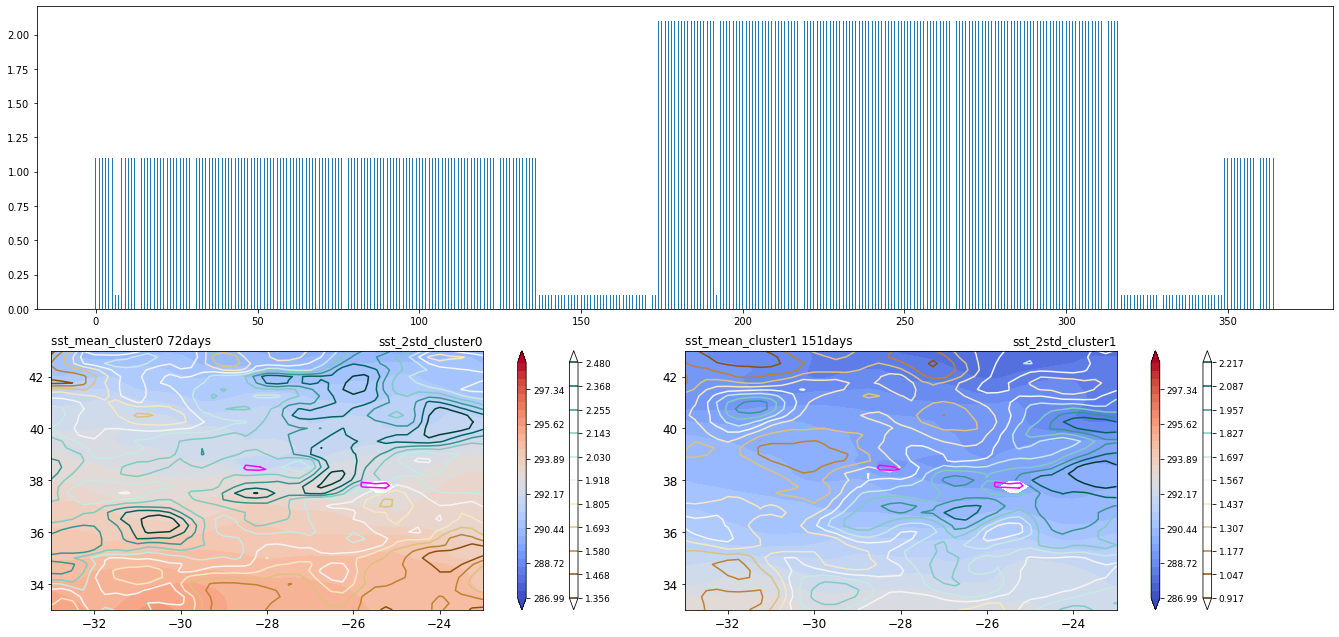

varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]


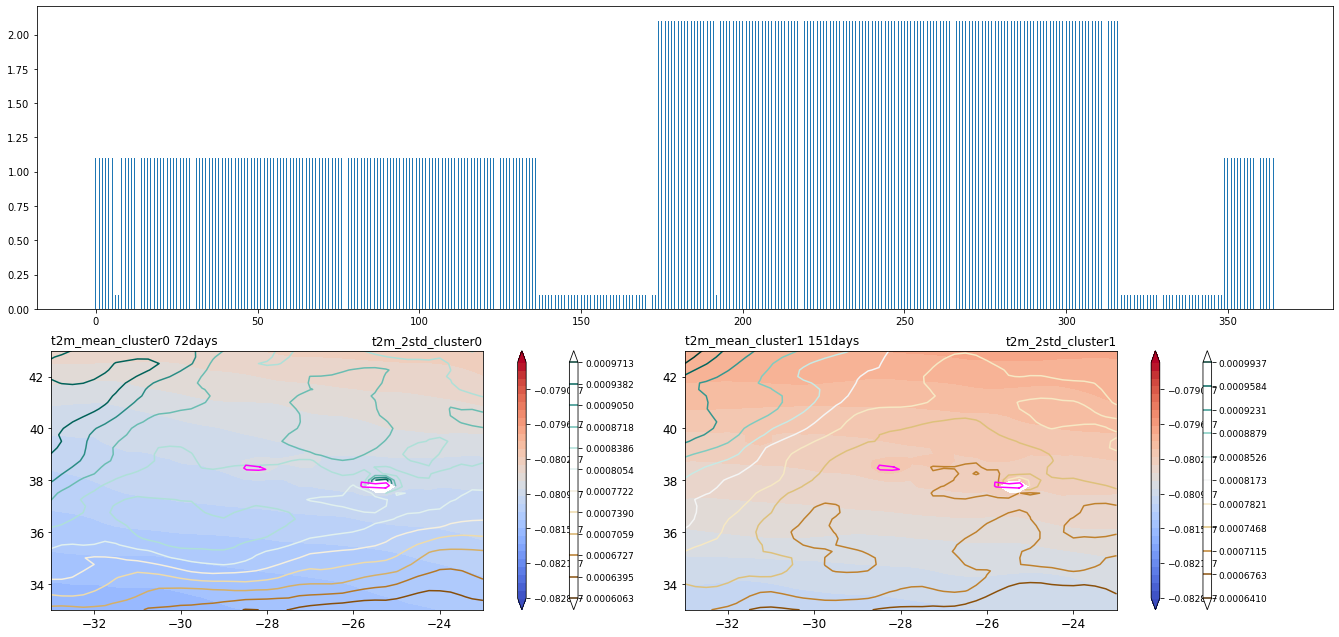

varid: u10
var_range: [-15.129702662479593, 16.82725476413482]


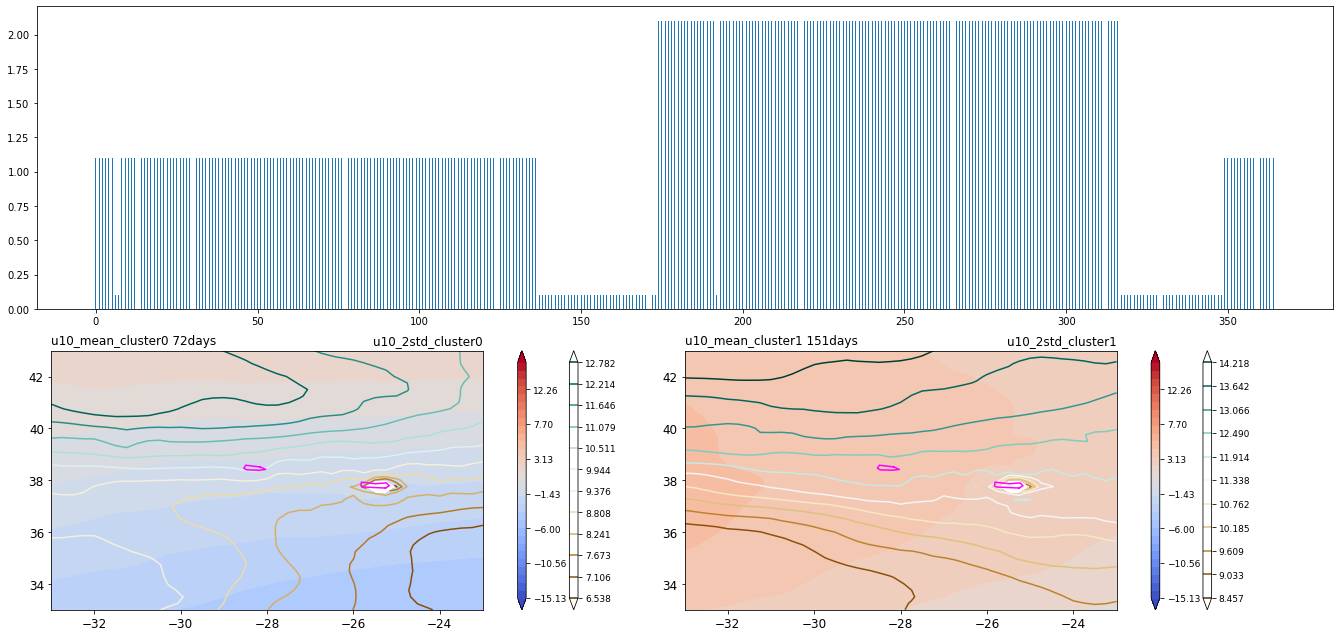

varid: v10
var_range: [-14.294945017569995, 14.039669939743764]


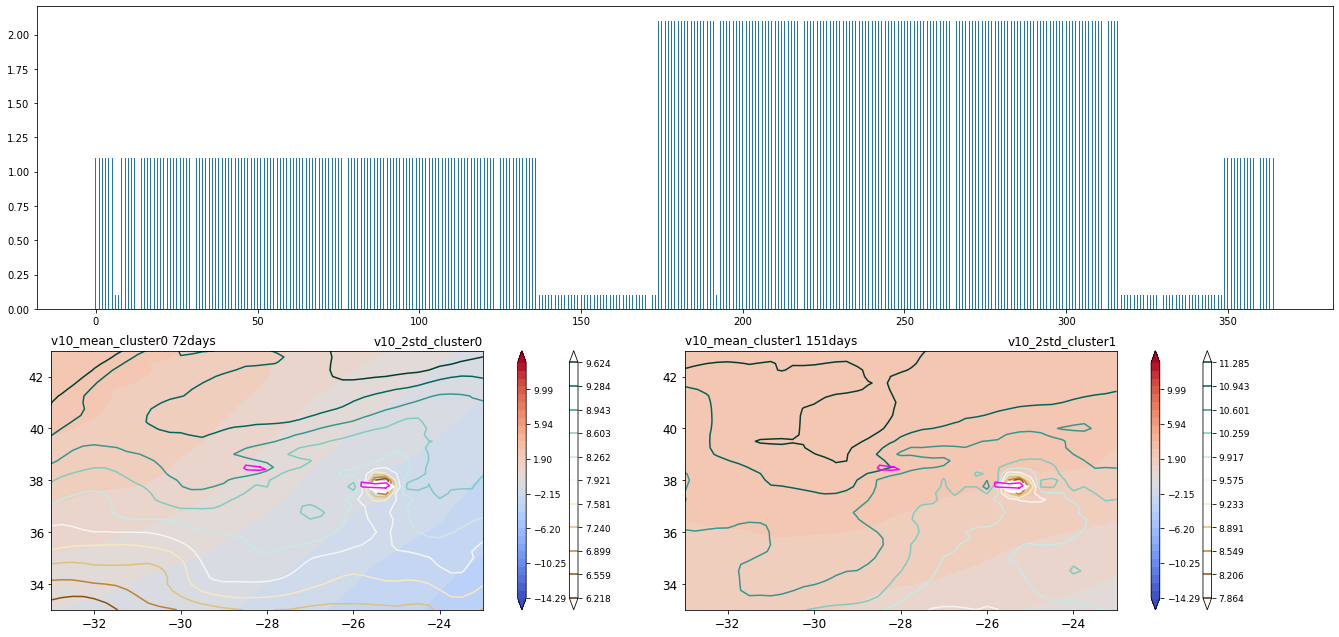

varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]


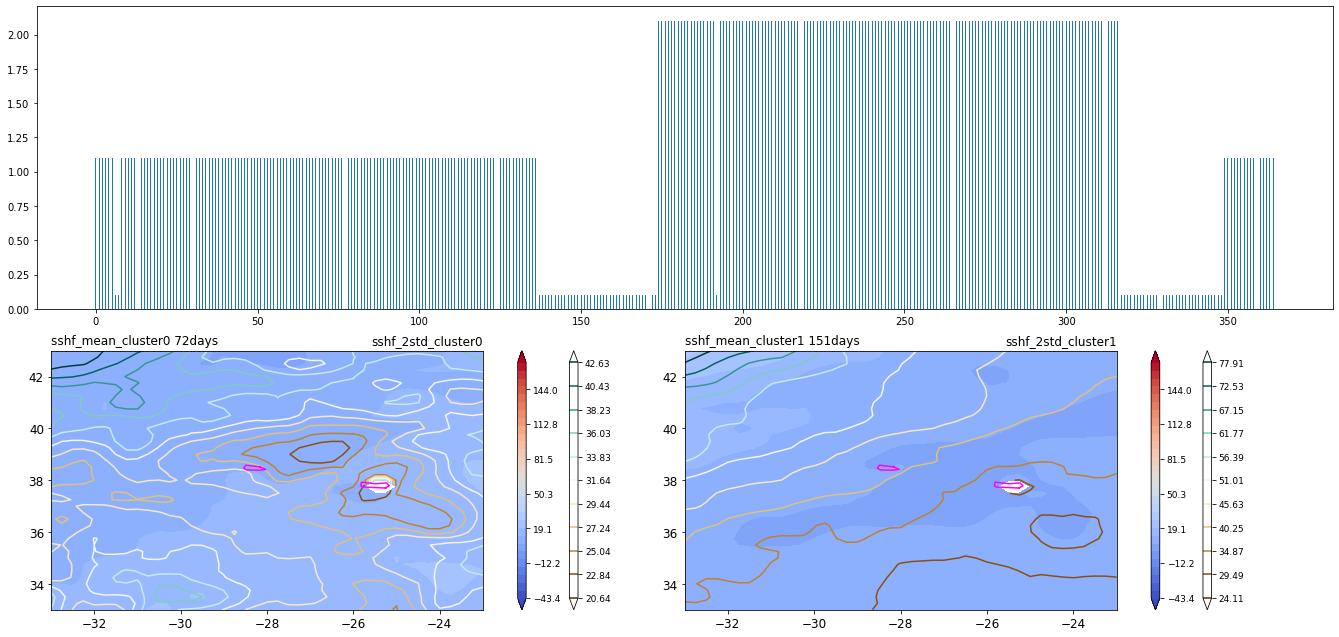

varid: slhf
var_range: [-17443.55070315274, -64.21228143772385]


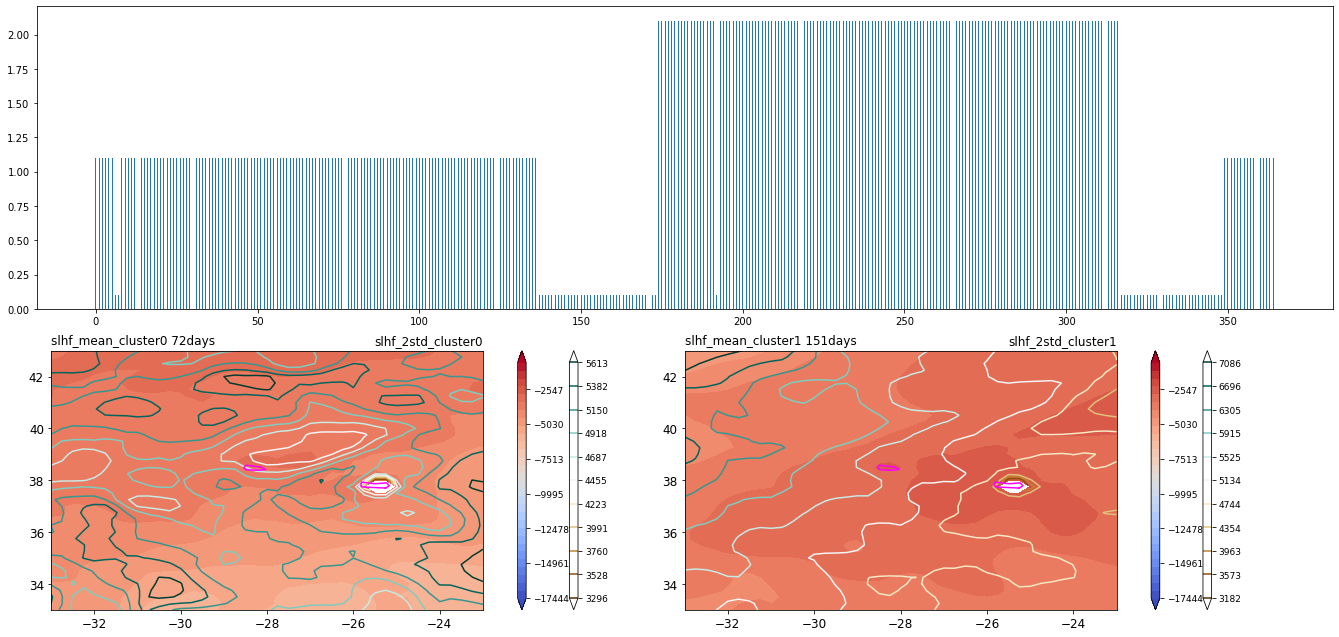

In [59]:
# Maps implementation with rdata_daily
input_dir = '/content/drive/MyDrive/Courses/IS-700-Independent_Study/'
data_file = 'ERA5_meteo_sfc_2021_daily.nc'
varids=['sst','t2m','u10','v10','sshf','slhf']
ccoefs=[1,-1./3600,1,1,-1./3600,1e-2]
ifplot = True
ERA5_daily_combined_10 ={}
cluster_filename='transformed_data_rdata_daily'
cluster_link = input_dir+cluster_filename+'.csv'
[days,id]=read_combined_cluster(cluster_link,'OK') 
n_cluster = max(id)-min(id)+1
# print('n_cluster is:',n_cluster)
width = 0.3
height = 0.5
panels=[(0.06, 0.08,width, height), (0.39, 0.08,width, height),(0.72, 0.08,width, height),
        (0.06, 0.38, width, height), (0.39, 0.38, width, height),(0.72, 0.38, width, height),
        (0.06, 0.68, width, height),(0.39, 0.68, width, height), (0.72, 0.68, width, height),
]
panels=[(0.06, 0.08,width, height), (0.5, 0.08,width, height),(0.05, 0.5,0.9, 0.3),]

for ivar in range(len(varids)):
  fig=plt.figure(1,figsize=[20,14])
  varid = varids[ivar]  
  var_range=[0,1]
  ccoef = ccoefs[ivar] 
  cmap0='coolwarm'
  colorbar = True
  fcase = input_dir+data_file
  fin = Dataset(fcase, "r")
  time = np.squeeze(fin['time'][:])
  lat0 = np.squeeze(fin['latitude'][:])
  lon0 = np.squeeze(fin['longitude'][:])
  sst0 = np.squeeze(fin['sst'][:])
  var0 = ccoef*np.squeeze(fin[varid][:])
  var0[np.isnan(sst0)]=np.nan  
  var_range[0]= np.nanmin(var0)+(np.nanmax(var0)-np.nanmin(var0))*0.05
  var_range[1]=np.nanmax(var0)-(np.nanmax(var0)-np.nanmin(var0))*0.05
  print('varid:',varid)
  print('var_range:',var_range)
  dl=0.25
  dh=0.25
  ddl=0.01
  ddh = 0.01
  for icluster in range(min([n_cluster,max(id),2])):
      days_icluster = days[np.where(id==icluster)[0]]
      ndays_icluster = len(days_icluster)
      time_icluster = np.zeros(ndays_icluster)
      var_icluster = np.zeros([ndays_icluster,len(lat0),len(lon0)])
      for iday in range(ndays_icluster):
          istep = np.where(time==days_icluster[iday])
          time_icluster[iday] = time[istep]
          var_icluster[iday]=  np.squeeze(var0[istep])       
      var_mean_icluster = np.nanmean(var_icluster,axis=0)
      var_std_icluster = 2*np.nanstd(var_icluster,axis=0)            
      ERA5_daily_combined_10[varid+'_mean_'+str(icluster)]= var_mean_icluster 
      ERA5_daily_combined_10[varid+'_std_'+str(icluster)]= var_std_icluster
      if(ivar ==0):  
        ERA5_daily_combined_10['time_'+str(icluster)]= time_icluster
        ERA5_daily_combined_10['days_'+str(icluster)]= days_icluster           

      p = plot_map(var_mean_icluster, var_range,lon0,lat0,fig,panels[icluster],cmap0,colorbar,varid+'_mean_cluster'+str(icluster)+' '+str(len(time_icluster))+'days',ifcontourf=True)
      #The below line has a error
      p = plot_map(var_std_icluster, [np.nanmin(var_std_icluster),np.nanmax(var_std_icluster)] ,lon0,lat0,fig,panels[icluster],'BrBG',colorbar,varid+'_2std_cluster'+str(icluster),ifcontourf=False)
  ax1 = fig.add_axes(panels[2])
  plt.bar(days,id+0.1,width=0.3)
  plt.show()  

<a name="t9.3"></a>
### **9.3. Clustering results and their evaluation with varying k value.**

<br>

>###### [Back to Table of Contents](#t0)

#### **k = 4**

In [60]:
centers = 4
kmeans = KMeans(n_clusters=centers)
kmeans.fit('rdata_daily',PCA=True,pass_trans_data=True)

class_centers_rdata_daily, classification_rdata_daily, transformed_data_rdata_daily = kmeans.evaluate('rdata_daily',PCA=True,pass_trans_data=True)

# classification_rdata_daily

In [61]:
final5_0 = RMSE('rdata_daily',classification_rdata_daily,normalize=True,pass_trans_data=True,PCA=True)
final5_0

,0,1,2,3
0,15.08,24.52,34.92,17.4
1,24.52,13.48,12.54,25.43
2,34.92,12.54,11.02,32.03
3,17.4,25.43,32.03,18.55


In [62]:
silhouette_avg_rdata_daily = silhouette_score1('rdata_daily', classification_rdata_daily)
print("The average silhouette_score is :", silhouette_avg_rdata_daily)

The average silhouette_score is : 0.1775952382537477


#### **k = 5**

In [63]:
centers = 5
kmeans = KMeans(n_clusters=centers)
kmeans.fit('rdata_daily',PCA=True,pass_trans_data=True)

class_centers_rdata_daily, classification_rdata_daily, transformed_data_rdata_daily = kmeans.evaluate('rdata_daily',PCA=True,pass_trans_data=True)

# classification_rdata_daily

In [64]:
final5_0 = RMSE('rdata_daily',classification_rdata_daily,normalize=True,pass_trans_data=True,PCA=True)
final5_0

,0,1,2,3,4
0,11.03,25.77,11.98,39.45,32.27
1,25.77,14.45,29.57,26.56,18.42
2,11.98,29.57,12.82,35.9,30.04
3,39.45,26.56,35.9,19.39,23.7
4,32.27,18.42,30.04,23.7,13.92


In [65]:
silhouette_avg_rdata_daily = silhouette_score1('rdata_daily', classification_rdata_daily)
print("The average silhouette_score is :", silhouette_avg_rdata_daily)

The average silhouette_score is : 0.18775509730989823


#### **k = 6**

In [66]:
centers = 6
kmeans = KMeans(n_clusters=centers)
kmeans.fit('rdata_daily',PCA=True,pass_trans_data=True)

class_centers_rdata_daily, classification_rdata_daily, transformed_data_rdata_daily = kmeans.evaluate('rdata_daily',PCA=True,pass_trans_data=True)

# classification_rdata_daily

In [67]:
final5_0 = RMSE('rdata_daily',classification_rdata_daily,normalize=True,pass_trans_data=True,PCA=True)
final5_0

,0,1,2,3,4,5
0,11.44,37.76,28.05,31.61,11.73,31.18
1,37.76,17.91,27.12,25.7,39.43,22.7
2,28.05,27.12,18.13,24.05,29.23,25.09
3,31.61,25.7,24.05,13.68,26.88,16.95
4,11.73,39.43,29.23,26.88,11.18,32.22
5,31.18,22.7,25.09,16.95,32.22,12.74


In [68]:
silhouette_avg_rdata_daily = silhouette_score1('rdata_daily', classification_rdata_daily)
print("The average silhouette_score is :", silhouette_avg_rdata_daily)

The average silhouette_score is : 0.17711217837584017


#### **k = 7**

In [69]:
centers = 7
kmeans = KMeans(n_clusters=centers)
kmeans.fit('rdata_daily',PCA=True,pass_trans_data=True)

class_centers_rdata_daily, classification_rdata_daily, transformed_data_rdata_daily = kmeans.evaluate('rdata_daily',PCA=True,pass_trans_data=True)

# classification_rdata_daily

In [70]:
final5_0 = RMSE('rdata_daily',classification_rdata_daily,normalize=True,pass_trans_data=True,PCA=True)
final5_0

,0,1,2,3,4,5,6
0,16.87,23.61,39.61,28.71,16.39,27.33,38.7
1,23.61,18.77,37.5,32.73,23.31,22.46,36.36
2,39.61,37.5,9.67,15.78,38.95,25.82,11.68
3,28.71,32.73,15.78,12.74,28.01,19.45,14.51
4,16.39,23.31,38.95,28.01,11.75,17.79,33.54
5,27.33,22.46,25.82,19.45,17.79,10.73,18.57
6,38.7,36.36,11.68,14.51,33.54,18.57,9.48


In [71]:
silhouette_avg_rdata_daily = silhouette_score1('rdata_daily', classification_rdata_daily)
print("The average silhouette_score is :", silhouette_avg_rdata_daily)

The average silhouette_score is : 0.16131671746141976


<a name="t9.4"></a>
### **9.4. Clustering results of daily data with and without PCA.**

<br>

>###### [Back to Table of Contents](#t0)

#### **Without PCA**

In [72]:
centers = 3
kmeans = KMeans(n_clusters=centers)
kmeans.fit('rdata_daily',PCA=False,pass_trans_data=True)

class_centers_rdata_daily, classification_rdata_daily, transformed_data_rdata_daily = kmeans.evaluate('rdata_daily',PCA=False,pass_trans_data=True)
transformed_data_rdata_daily = modify_date(transformed_data_rdata_daily)
save_df(transformed_data_rdata_daily,'transformed_data_rdata_daily')

classification_rdata_daily

[2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


varid: sst
var_range: [286.9919318332959, 299.0668423730597]


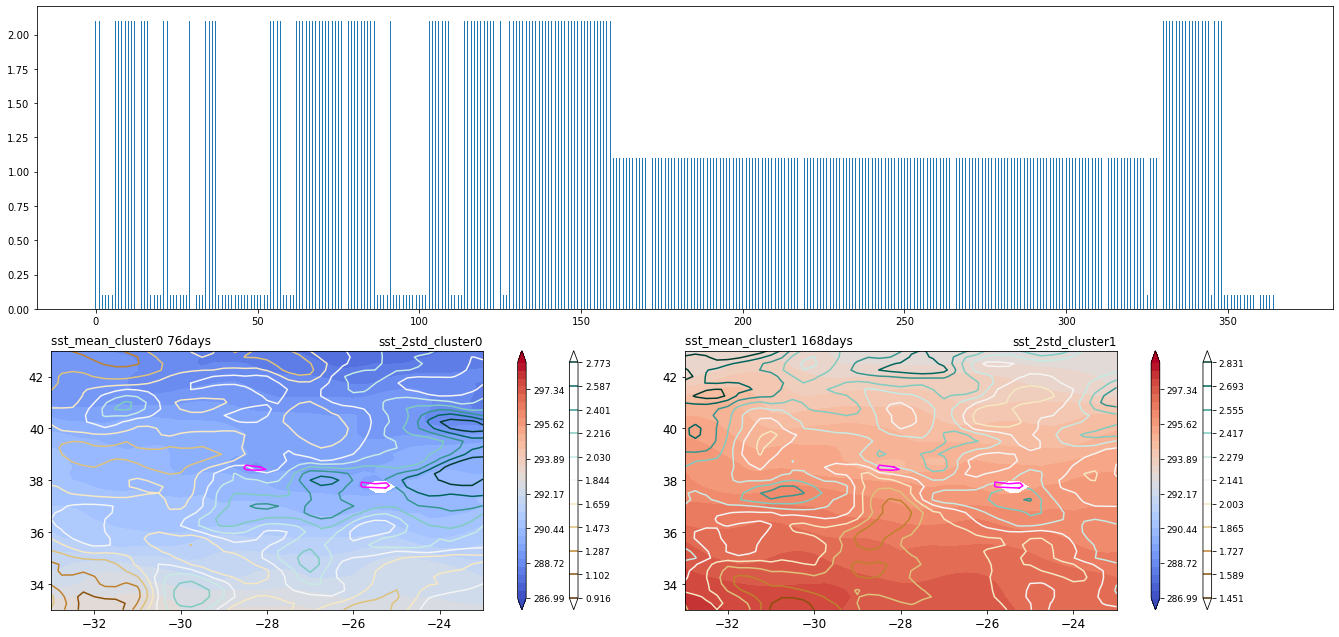

varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]


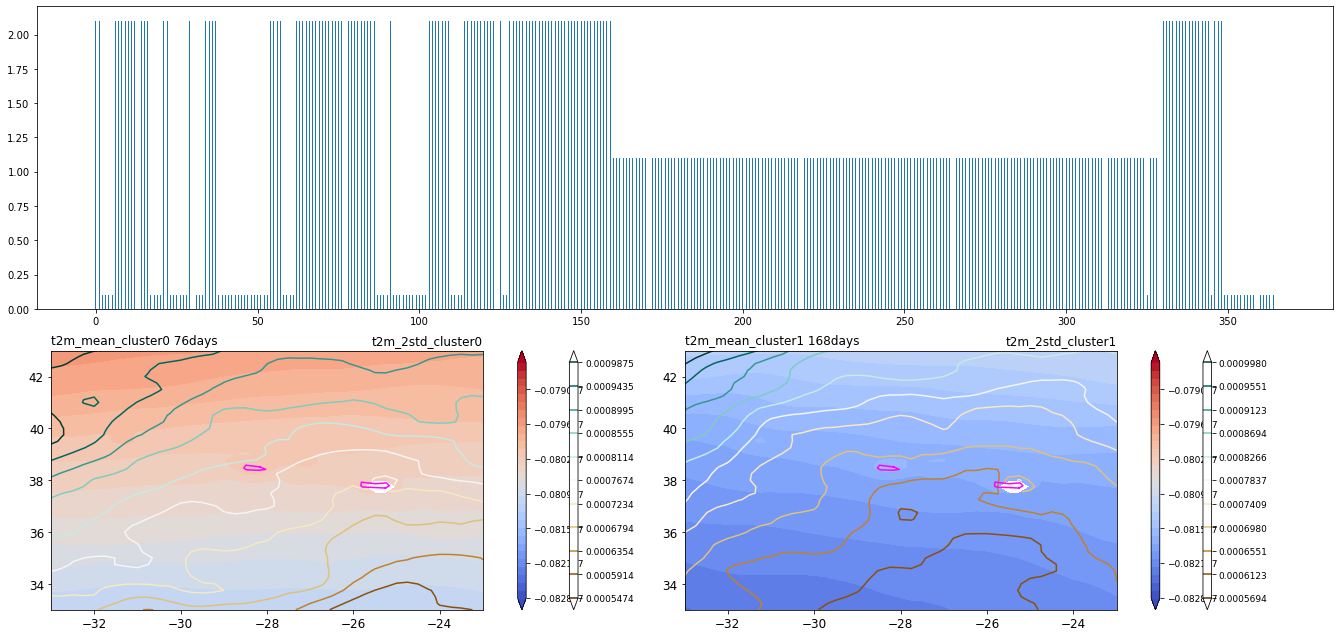

varid: u10
var_range: [-15.129702662479593, 16.82725476413482]


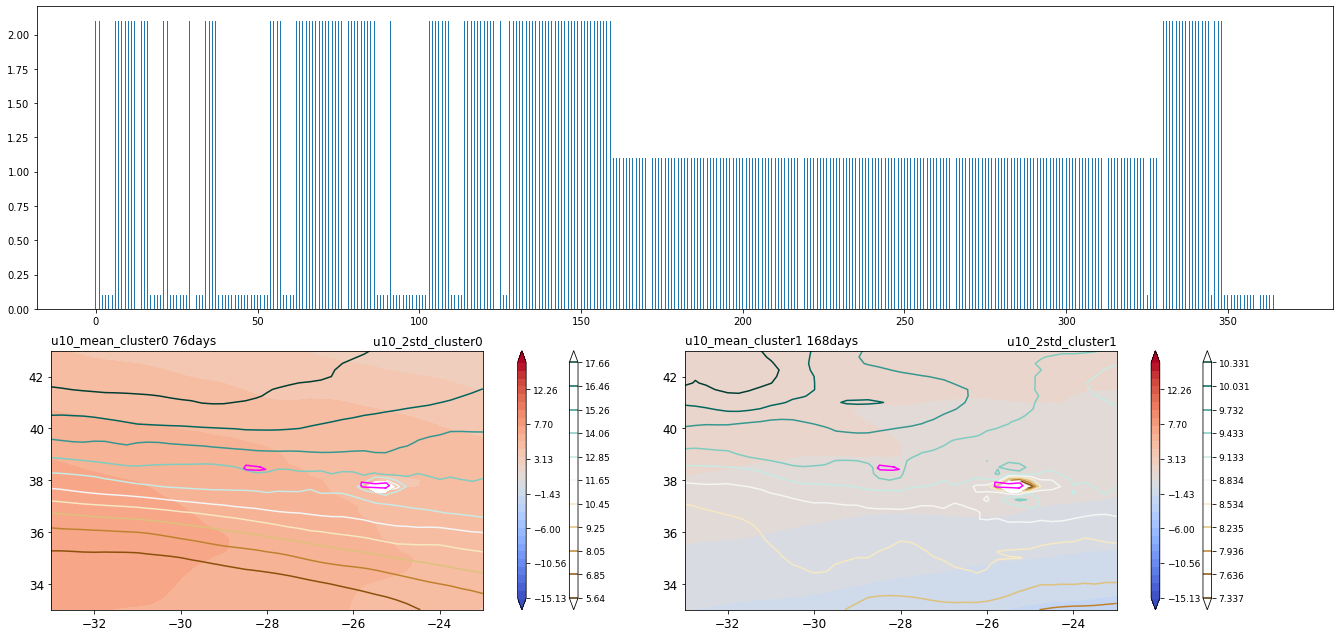

varid: v10
var_range: [-14.294945017569995, 14.039669939743764]


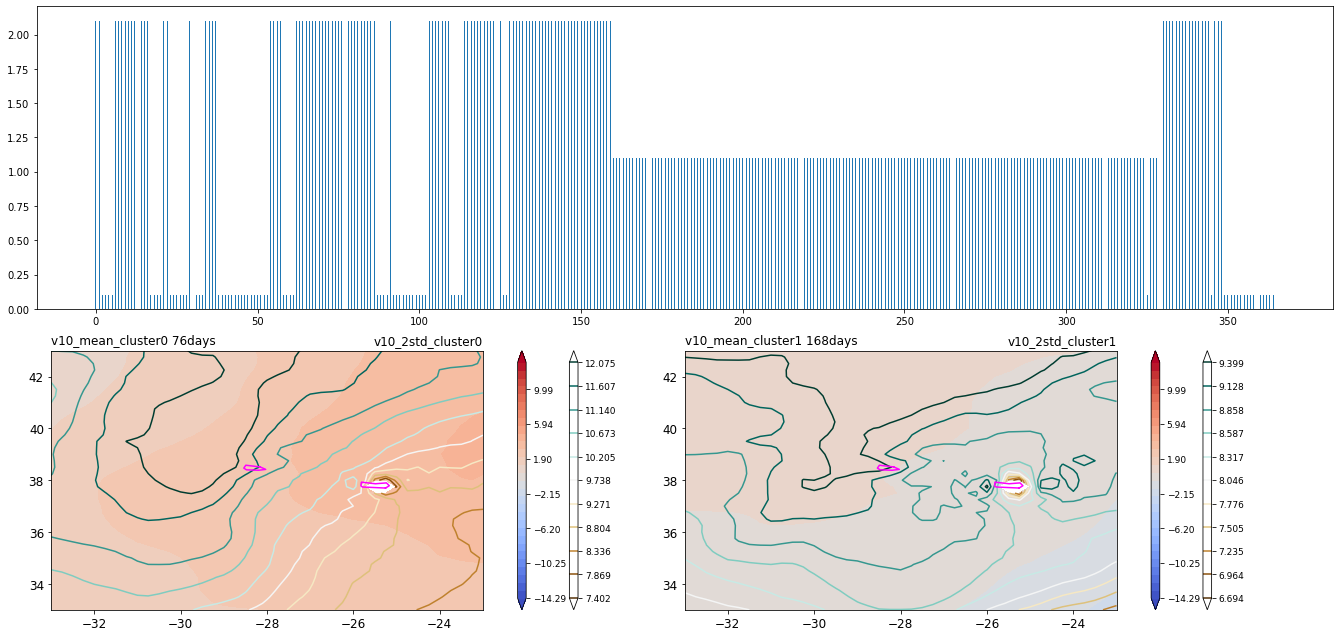

varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]


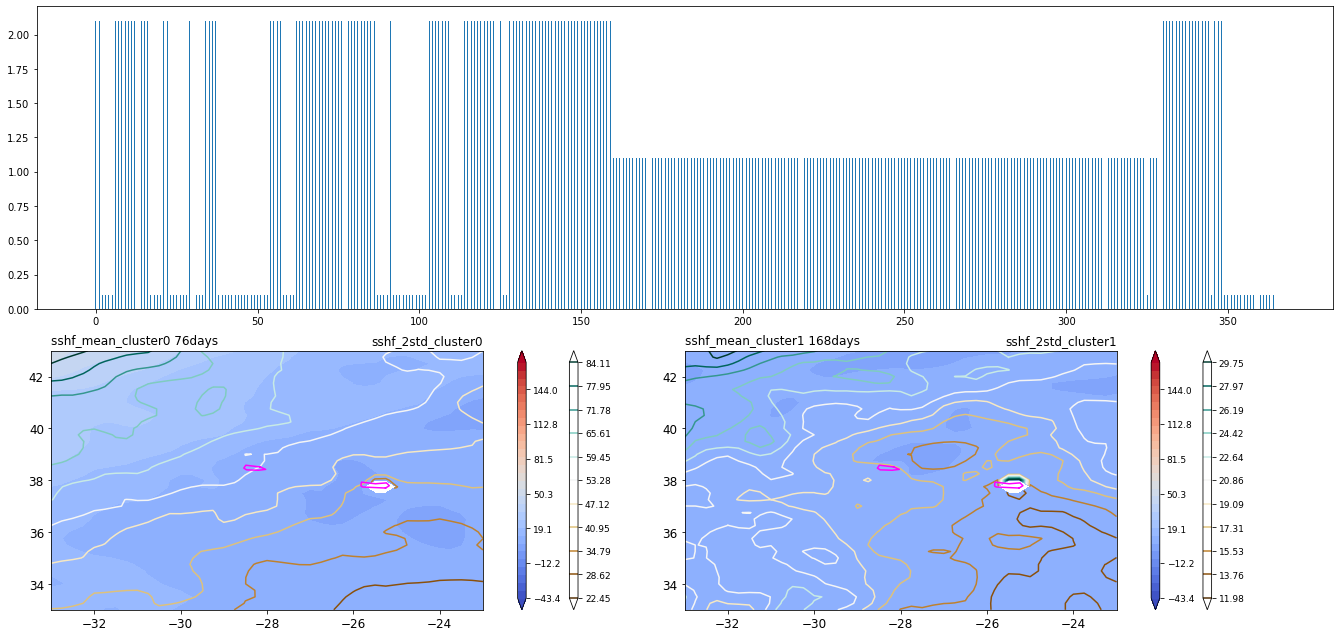

varid: slhf
var_range: [-17443.55070315274, -64.21228143772385]


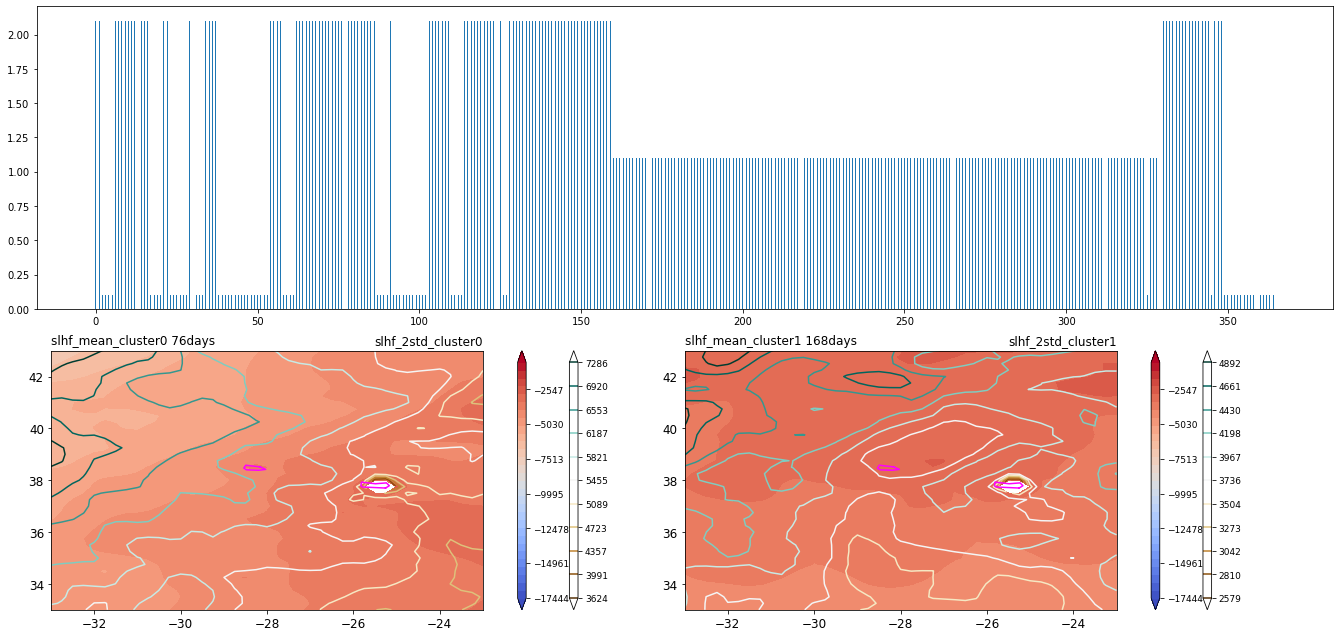

In [73]:
# Maps implementation with rdata_daily
input_dir = '/content/drive/MyDrive/Courses/IS-700-Independent_Study/'
data_file = 'ERA5_meteo_sfc_2021_daily.nc'
varids=['sst','t2m','u10','v10','sshf','slhf']
ccoefs=[1,-1./3600,1,1,-1./3600,1e-2]
ifplot = True
ERA5_daily_combined_10 ={}
cluster_filename='transformed_data_rdata_daily'
cluster_link = input_dir+cluster_filename+'.csv'
[days,id]=read_combined_cluster(cluster_link,'OK') 
n_cluster = max(id)-min(id)+1
# print('n_cluster is:',n_cluster)
width = 0.3
height = 0.5
panels=[(0.06, 0.08,width, height), (0.39, 0.08,width, height),(0.72, 0.08,width, height),
        (0.06, 0.38, width, height), (0.39, 0.38, width, height),(0.72, 0.38, width, height),
        (0.06, 0.68, width, height),(0.39, 0.68, width, height), (0.72, 0.68, width, height),
]
panels=[(0.06, 0.08,width, height), (0.5, 0.08,width, height),(0.05, 0.5,0.9, 0.3),]

for ivar in range(len(varids)):
  fig=plt.figure(1,figsize=[20,14])
  varid = varids[ivar]  
  var_range=[0,1]
  ccoef = ccoefs[ivar] 
  cmap0='coolwarm'
  colorbar = True
  fcase = input_dir+data_file
  fin = Dataset(fcase, "r")
  time = np.squeeze(fin['time'][:])
  lat0 = np.squeeze(fin['latitude'][:])
  lon0 = np.squeeze(fin['longitude'][:])
  sst0 = np.squeeze(fin['sst'][:])
  var0 = ccoef*np.squeeze(fin[varid][:])
  var0[np.isnan(sst0)]=np.nan  
  var_range[0]= np.nanmin(var0)+(np.nanmax(var0)-np.nanmin(var0))*0.05
  var_range[1]=np.nanmax(var0)-(np.nanmax(var0)-np.nanmin(var0))*0.05
  print('varid:',varid)
  print('var_range:',var_range)
  dl=0.25
  dh=0.25
  ddl=0.01
  ddh = 0.01
  for icluster in range(min([n_cluster,max(id),2])):
      days_icluster = days[np.where(id==icluster)[0]]
      ndays_icluster = len(days_icluster)
      time_icluster = np.zeros(ndays_icluster)
      var_icluster = np.zeros([ndays_icluster,len(lat0),len(lon0)])
      for iday in range(ndays_icluster):
          istep = np.where(time==days_icluster[iday])
          time_icluster[iday] = time[istep]
          var_icluster[iday]=  np.squeeze(var0[istep])       
      var_mean_icluster = np.nanmean(var_icluster,axis=0)
      var_std_icluster = 2*np.nanstd(var_icluster,axis=0)            
      ERA5_daily_combined_10[varid+'_mean_'+str(icluster)]= var_mean_icluster 
      ERA5_daily_combined_10[varid+'_std_'+str(icluster)]= var_std_icluster
      if(ivar ==0):  
        ERA5_daily_combined_10['time_'+str(icluster)]= time_icluster
        ERA5_daily_combined_10['days_'+str(icluster)]= days_icluster           

      p = plot_map(var_mean_icluster, var_range,lon0,lat0,fig,panels[icluster],cmap0,colorbar,varid+'_mean_cluster'+str(icluster)+' '+str(len(time_icluster))+'days',ifcontourf=True)
      #The below line has a error
      p = plot_map(var_std_icluster, [np.nanmin(var_std_icluster),np.nanmax(var_std_icluster)] ,lon0,lat0,fig,panels[icluster],'BrBG',colorbar,varid+'_2std_cluster'+str(icluster),ifcontourf=False)
  ax1 = fig.add_axes(panels[2])
  plt.bar(days,id+0.1,width=0.3)
  plt.show()  

#### **With PCA**

In [74]:
centers = 3
kmeans = KMeans(n_clusters=centers)
kmeans.fit('rdata_daily',PCA=True,pass_trans_data=True)

class_centers_rdata_daily, classification_rdata_daily, transformed_data_rdata_daily = kmeans.evaluate('rdata_daily',PCA=True,pass_trans_data=True)
transformed_data_rdata_daily = modify_date(transformed_data_rdata_daily)
save_df(transformed_data_rdata_daily,'transformed_data_rdata_daily')

classification_rdata_daily

[0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


varid: sst
var_range: [286.9919318332959, 299.0668423730597]


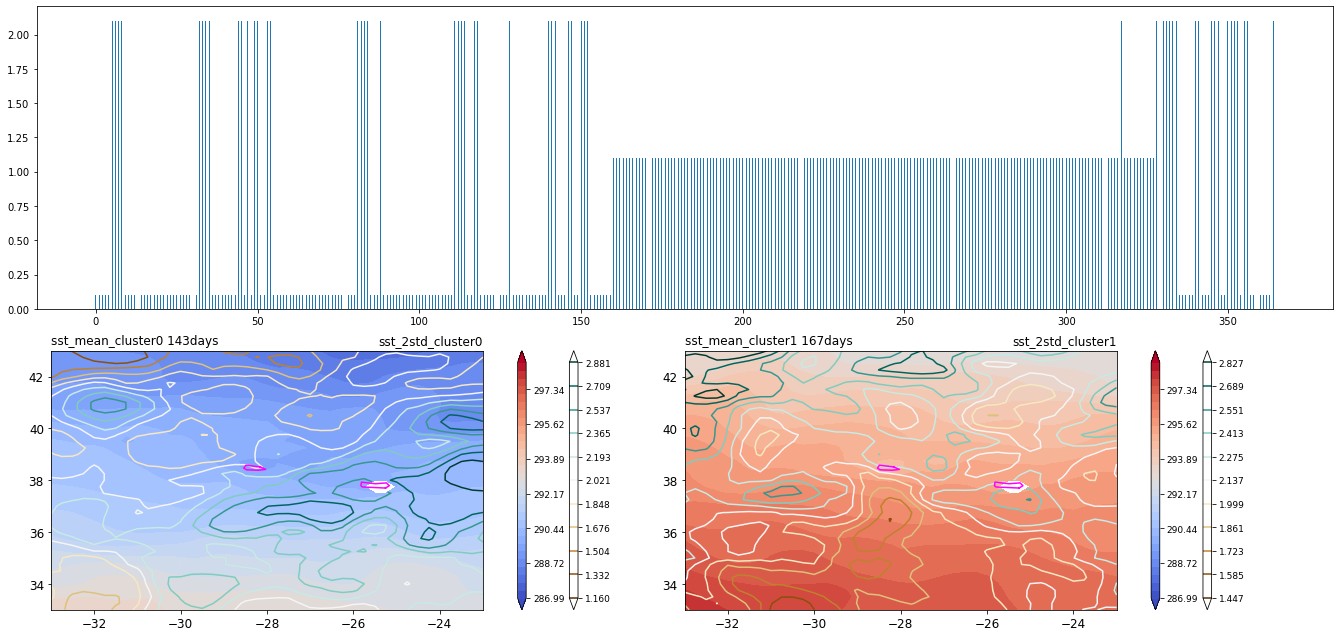

varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]


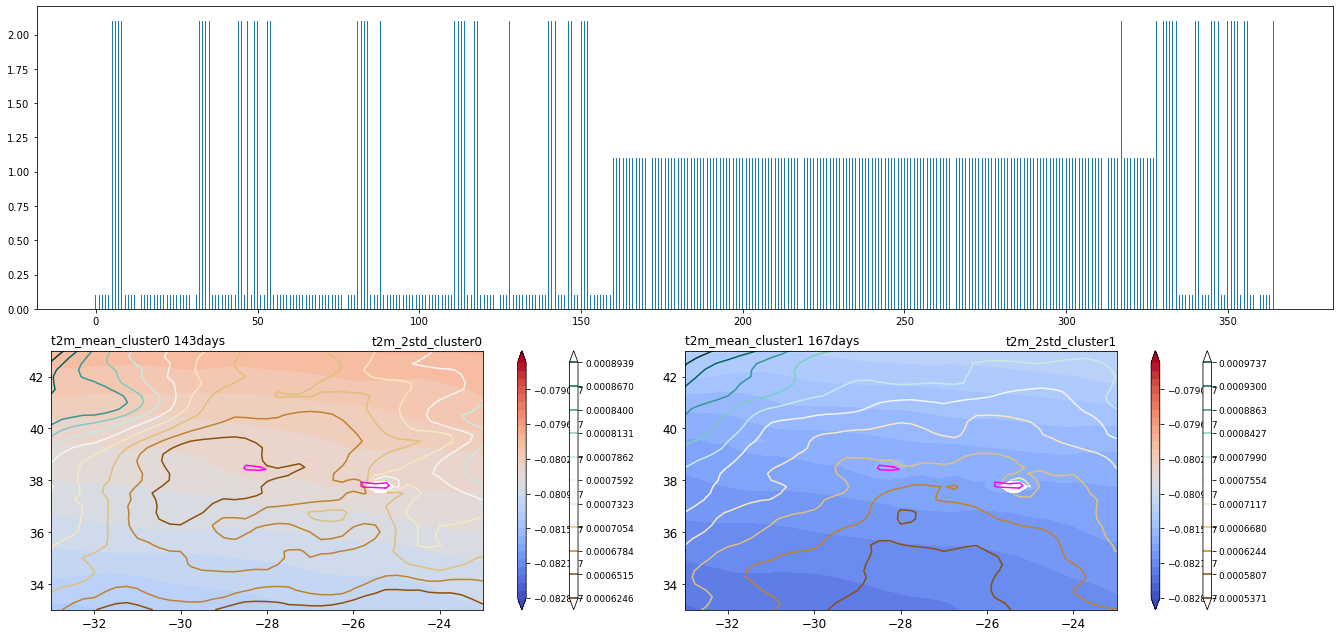

varid: u10
var_range: [-15.129702662479593, 16.82725476413482]


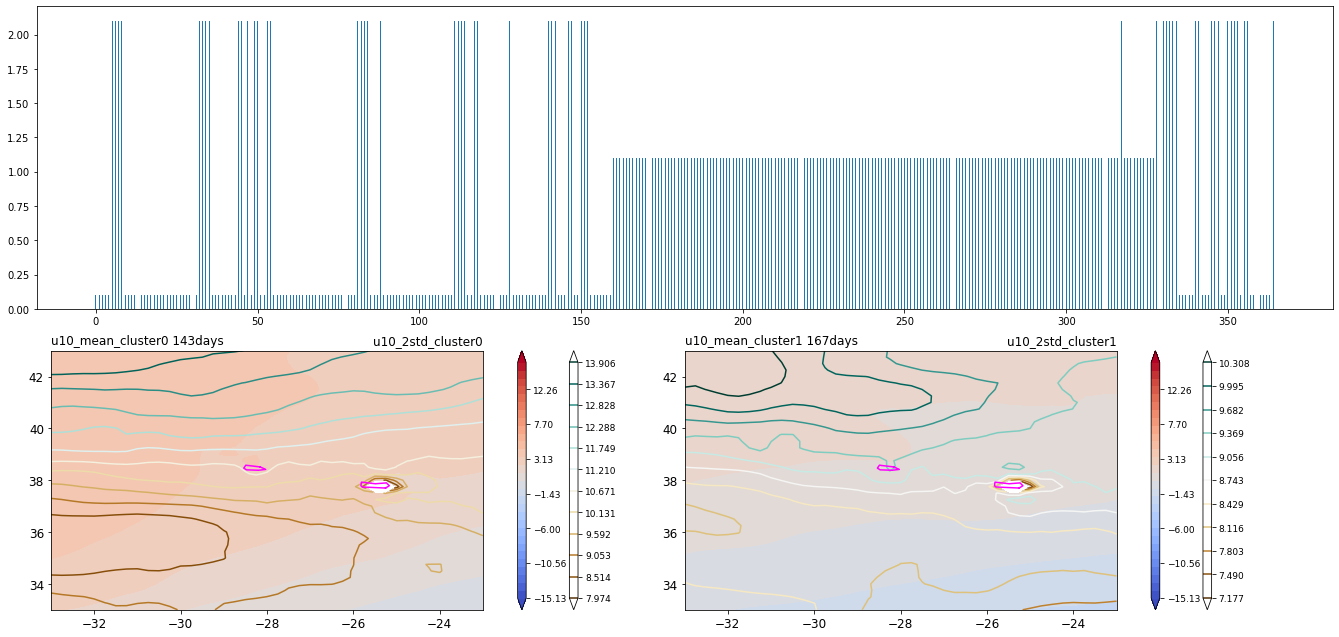

varid: v10
var_range: [-14.294945017569995, 14.039669939743764]


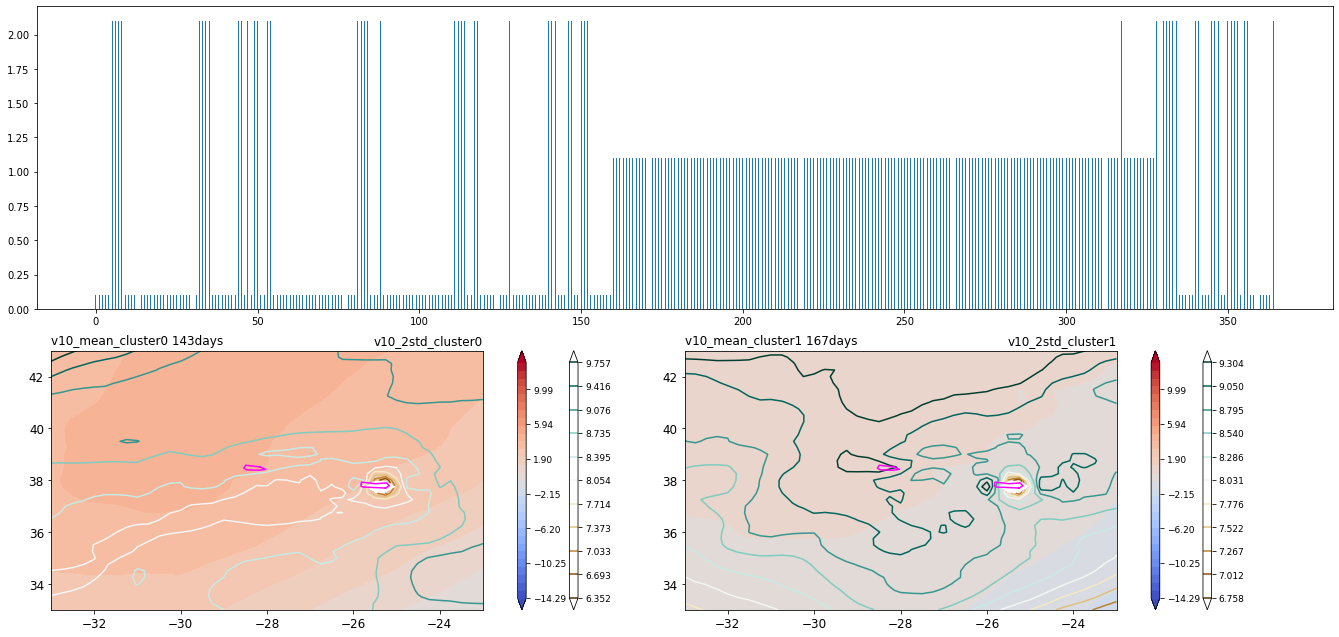

varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]


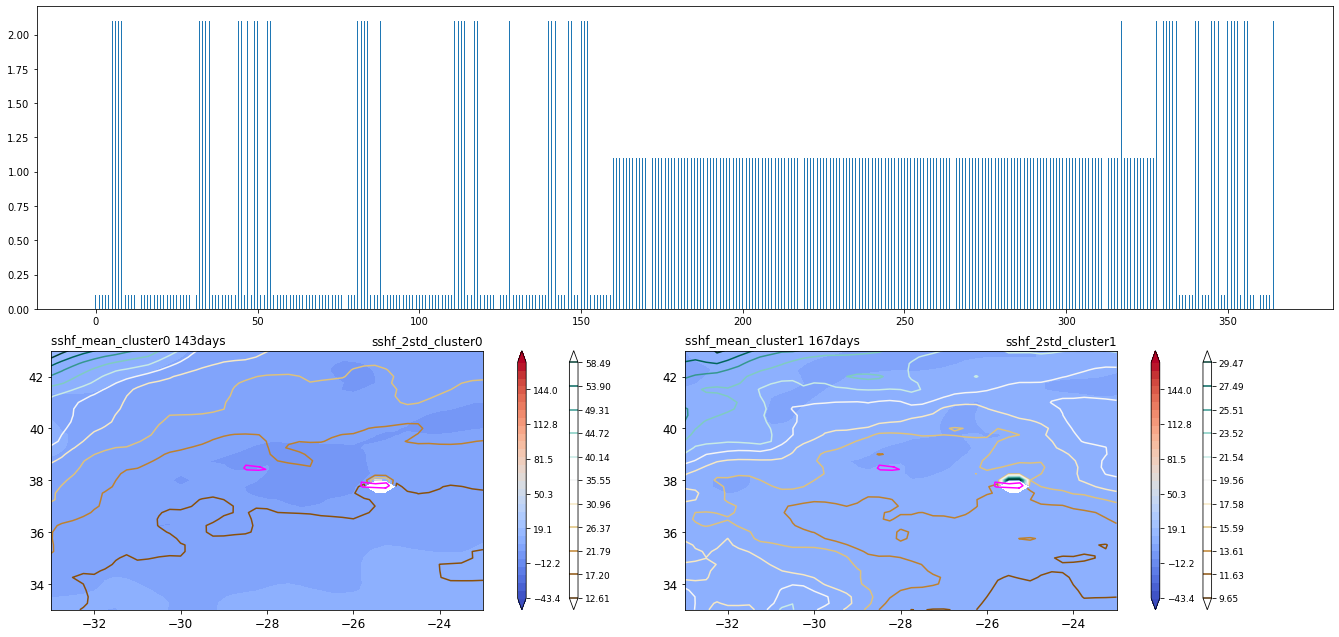

varid: slhf
var_range: [-17443.55070315274, -64.21228143772385]


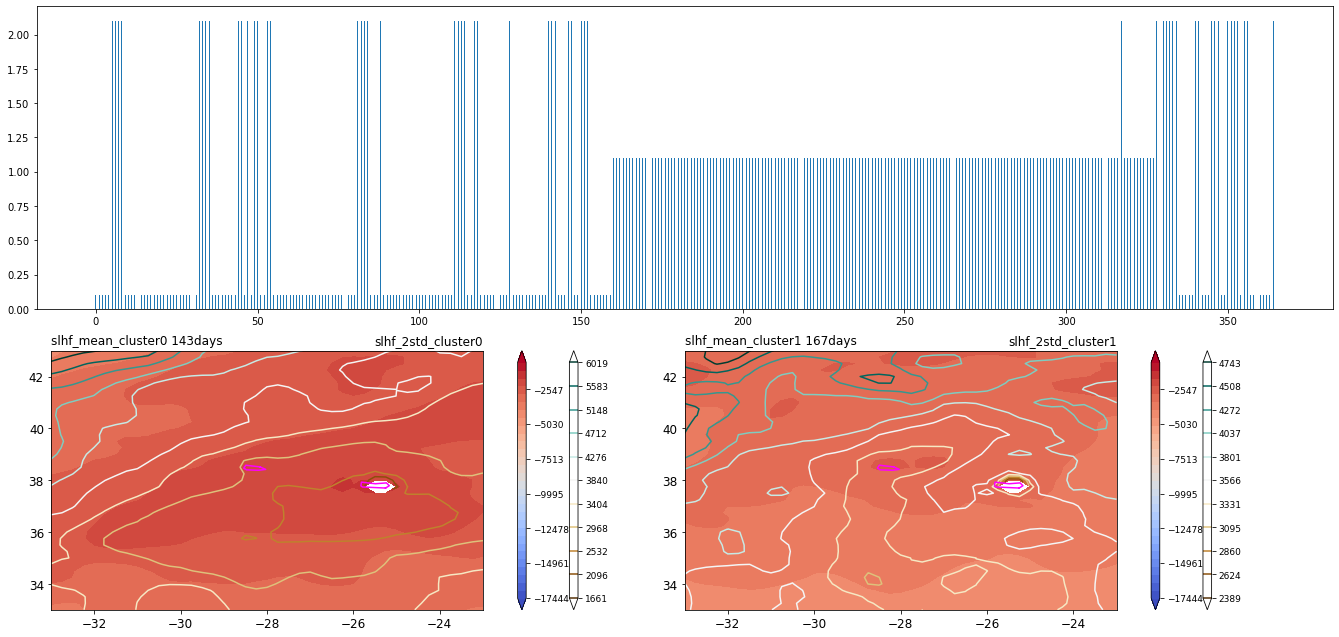

In [75]:
# Maps implementation with rdata_daily
input_dir = '/content/drive/MyDrive/Courses/IS-700-Independent_Study/'
data_file = 'ERA5_meteo_sfc_2021_daily.nc'
varids=['sst','t2m','u10','v10','sshf','slhf']
ccoefs=[1,-1./3600,1,1,-1./3600,1e-2]
ifplot = True
ERA5_daily_combined_10 ={}
cluster_filename='transformed_data_rdata_daily'
cluster_link = input_dir+cluster_filename+'.csv'
[days,id]=read_combined_cluster(cluster_link,'OK') 
n_cluster = max(id)-min(id)+1
# print('n_cluster is:',n_cluster)
width = 0.3
height = 0.5
panels=[(0.06, 0.08,width, height), (0.39, 0.08,width, height),(0.72, 0.08,width, height),
        (0.06, 0.38, width, height), (0.39, 0.38, width, height),(0.72, 0.38, width, height),
        (0.06, 0.68, width, height),(0.39, 0.68, width, height), (0.72, 0.68, width, height),
]
panels=[(0.06, 0.08,width, height), (0.5, 0.08,width, height),(0.05, 0.5,0.9, 0.3),]

for ivar in range(len(varids)):
  fig=plt.figure(1,figsize=[20,14])
  varid = varids[ivar]  
  var_range=[0,1]
  ccoef = ccoefs[ivar] 
  cmap0='coolwarm'
  colorbar = True
  fcase = input_dir+data_file
  fin = Dataset(fcase, "r")
  time = np.squeeze(fin['time'][:])
  lat0 = np.squeeze(fin['latitude'][:])
  lon0 = np.squeeze(fin['longitude'][:])
  sst0 = np.squeeze(fin['sst'][:])
  var0 = ccoef*np.squeeze(fin[varid][:])
  var0[np.isnan(sst0)]=np.nan  
  var_range[0]= np.nanmin(var0)+(np.nanmax(var0)-np.nanmin(var0))*0.05
  var_range[1]=np.nanmax(var0)-(np.nanmax(var0)-np.nanmin(var0))*0.05
  print('varid:',varid)
  print('var_range:',var_range)
  dl=0.25
  dh=0.25
  ddl=0.01
  ddh = 0.01
  for icluster in range(min([n_cluster,max(id),2])):
      days_icluster = days[np.where(id==icluster)[0]]
      ndays_icluster = len(days_icluster)
      time_icluster = np.zeros(ndays_icluster)
      var_icluster = np.zeros([ndays_icluster,len(lat0),len(lon0)])
      for iday in range(ndays_icluster):
          istep = np.where(time==days_icluster[iday])
          time_icluster[iday] = time[istep]
          var_icluster[iday]=  np.squeeze(var0[istep])       
      var_mean_icluster = np.nanmean(var_icluster,axis=0)
      var_std_icluster = 2*np.nanstd(var_icluster,axis=0)            
      ERA5_daily_combined_10[varid+'_mean_'+str(icluster)]= var_mean_icluster 
      ERA5_daily_combined_10[varid+'_std_'+str(icluster)]= var_std_icluster
      if(ivar ==0):  
        ERA5_daily_combined_10['time_'+str(icluster)]= time_icluster
        ERA5_daily_combined_10['days_'+str(icluster)]= days_icluster           

      p = plot_map(var_mean_icluster, var_range,lon0,lat0,fig,panels[icluster],cmap0,colorbar,varid+'_mean_cluster'+str(icluster)+' '+str(len(time_icluster))+'days',ifcontourf=True)
      #The below line has a error
      p = plot_map(var_std_icluster, [np.nanmin(var_std_icluster),np.nanmax(var_std_icluster)] ,lon0,lat0,fig,panels[icluster],'BrBG',colorbar,varid+'_2std_cluster'+str(icluster),ifcontourf=False)
  ax1 = fig.add_axes(panels[2])
  plt.bar(days,id+0.1,width=0.3)
  plt.show()  

<a name="t10"></a>
## **10. Findings:**


>###### [Back to Table of Contents](#t0)

#### **1. First Finding:**
<p align="justify">
The model performs better when PCA is used to reduce the dimensionality of the data, despite the slight difference. Regardless of the data used, the result of the RMSE function appeared a little better.
</p>

#### **2. Second Finding:**

<p align="justify">
The evaluation scores of clustering results using the Root Mean Squared Error and Silhouette Score methods were not very promising when the data was not normalized. The intra cluster RMSE scores turned out to be greater than the inter cluster RMSE scores. This leads us to the conclusion that normalizing the data tends to improve algorithm performance.
</p>

#### **3. Third Finding:**
<p align="justify">
We spent a lot of time testing the algorithm on many iterations of mock data before running it on the real data. Although the elbow curve method did a decent job in figuring out the number of clusters for the data (value of k), it wasn't quite close to reality.
<p align="justify">
Below are a couple of examples that highlight this finding. We were aware that there were four clusters in the data in mock data versions 4 and 3.1. But the algorithm could only find three. It is very evident from the samples given that the data actually has four clusters. By evaluating the clusters created using the RMSE and Silhouette Score functions, this is supported. Since the model doesn't work flawlessly with the mock data, it certainly wouldn't work well with the real data.
<p align="justify">
Figuring out how many clusters are present in the data is the main reason behind performing clustering in the first place. Although the algorithm is doing a fairly decent job, completely relying on it to figure out the clusters wouldn't be the best course of action.
</p>

##### **Mock_v4.nc**

In [76]:
centers = 4
kmeans = KMeans(n_clusters=centers)
kmeans.fit('mdata_4',PCA=True,pass_trans_data=True)

class_centers_mdata_4, classification_mdata_4, transformed_data_mdata_4 = kmeans.evaluate('mdata_4',PCA=True,pass_trans_data=True)

classification_mdata_4

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0]

In [77]:
finding1 = RMSE('mdata_4',classification_mdata_4,normalize=True,pass_trans_data=True,PCA=True)
finding1

,0,1,2,3
0,0.0,13.52,13.57,0.07
1,13.52,0.0,0.05,13.45
2,13.57,0.05,0.0,13.5
3,0.07,13.45,13.5,0.0


In [78]:
silhouette_avg_mdata_4 = silhouette_score1('mdata_4', classification_mdata_4)
print("The average silhouette_score is :", silhouette_avg_mdata_4)

The average silhouette_score is : 1.0


##### **Mock_v3.1.nc**

In [79]:
centers = 4
kmeans = KMeans(n_clusters=centers)
kmeans.fit('mdata_3_1',PCA=True,pass_trans_data=True)

class_centers_mdata_3_1, classification_mdata_3_1, transformed_data_mdata_3_1 = kmeans.evaluate('mdata_3_1',PCA=True,pass_trans_data=True)

classification_mdata_3_1

[0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3]

In [80]:
finding2 = RMSE('mdata_3_1',classification_mdata_3_1,normalize=True,pass_trans_data=True,PCA=True)
finding2

,0,1,2,3
0,0.0,11.12,1.26,10.8
1,11.12,0.0,10.8,5.6
2,1.26,10.8,0.0,11.12
3,10.8,5.6,11.12,0.0


In [81]:
silhouette_avg_mdata_3_1 = silhouette_score1('mdata_3_1', classification_mdata_3_1)
print("The average silhouette_score is :", silhouette_avg_mdata_3_1)

The average silhouette_score is : 1.0


<a name="t11"></a>
## **11. Summary:**
<p align="justify">
We had embarked on this journey with the task of extending an existing clustering algorithm to make it work with a four dimensional weather dataset. In the past, the K-means technique was exclusively used with two-dimensional data. However, in this project, we were able to accomplish the feat of making it function with higher dimensional data, specifically four dimensional data, which includes time, latitude, longitude, and the dataset's variables.
<p align="justify">
Although we could accomplish this task, the advantages and limitations of this algorithm still remain the same.<br>

##### **Advantages:**
<p align="justify">
1. When compared to the other clustering algorithms, implementing K-means on higher dimensional data is still relatively simple to implement.<br>
2. The algorithm may scale to enormous datasets as long as the data can be effectively converted to a two-dimensional data format.<br>
3. Since PCA has also been implemented in this project, the algorithm has developed the capability of scaling with the number of dimensions. <br>

##### **Limitations:**
<p align="justify">
1. The algorithm still depends on the initial values. While choosing the value of k, running the algorithm several times, with different initial values and picking the best result is easy when the value of k is low. As the value of k increases, we might need advanced versions of the algorithm to pick better values of the initial centroids.<br>
2. The algorithm still finds it difficult to cluster data of varying sizes and density. If the data takes an arbitrary shape as compared to the spherical shape that the algorithm is usually accustomed to, then it struggles to generate the clusters.
</p>
<br>

<p align="justify">
Hence, trying out other algorithms like the Density Based Scanning (DB Scan) method might be a good course of action to follow.
</p>
<br>

>###### [Back to Table of Contents](#t0)

<a name="t12"></a>
## **12. References:**

1. Copernicus Climate Data Store. Retrieved August 19, 2022, from https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview  
2. Brownlee, J. (2020, August 27). How to use StandardScaler and MinMaxScaler transforms in Python. Machine Learning Mastery. Retrieved August 19, 2022, from https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ 
3. Gustafsen, A. (2022, July 24). Principal component analysis. talkingdatascience. Retrieved August 19, 2022, from https://talkingdatascience.com/principal-component-analysis/ 
4. Pramoditha, R. (2022, April 25). How to select the best number of Principal Components for the Dataset. Medium. Retrieved August 19, 2022, from https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
5. Elbow method for optimal value of K in kmeans. GeeksforGeeks. (2022, May 18). Retrieved August 19, 2022, from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/ 
6. Luke, T. ML-algos/k_means.py at main · Turnerluke/ML-Algos. GitHub. Retrieved August 19, 2022, from https://github.com/turnerluke/ML-algos/blob/main/k_means/k_means.py 
7. Moody, J. (2019, September 6). What does RMSE really mean? Medium. Retrieved August 19, 2022, from https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e 


<br>

>###### [Back to Table of Contents](#t0)